# 라이브러리 로드

In [145]:
# 데이터 분석
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼 출력 생략 해제
pd.set_option('display.max_columns', None)

# 시각화 한글 표시
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col="EmployeeNumber")
df_raw.shape

(1470, 34)

In [3]:
df_raw.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [4]:
df = df_raw.copy()
df.shape

(1470, 34)

# 데이터 확인 및 전처리

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## 결측치 확인

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

## 중복값 확인

In [7]:
df.duplicated().sum()

0

## 문자열 컬럼 확인

In [8]:
# 문자열 컬럼만 출력
df.select_dtypes("object").head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
EmployeeNumber,,,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
2,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
4,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
5,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
7,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [9]:
# 문자열 컬럼의 기술통계값
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

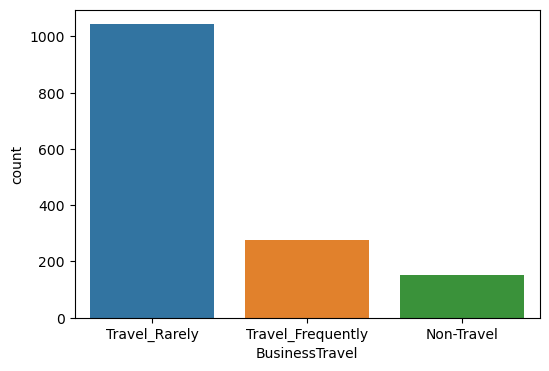

In [10]:
# 출장을 드물게 간 직원이 가장 많음
display(df["BusinessTravel"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df["BusinessTravel"])

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot: xlabel='Department', ylabel='count'>

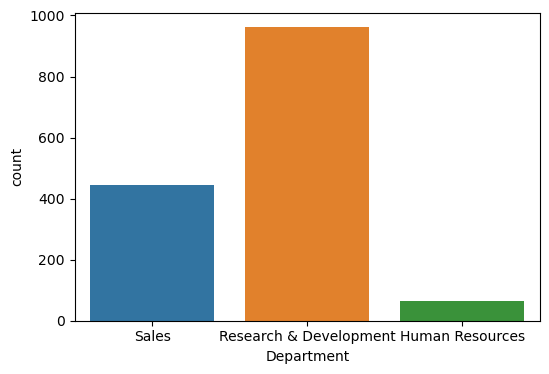

In [11]:
# R&D 부서가 가장 많고, Sales, HR 순.
display(df["Department"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df["Department"])

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot: xlabel='EducationField', ylabel='count'>

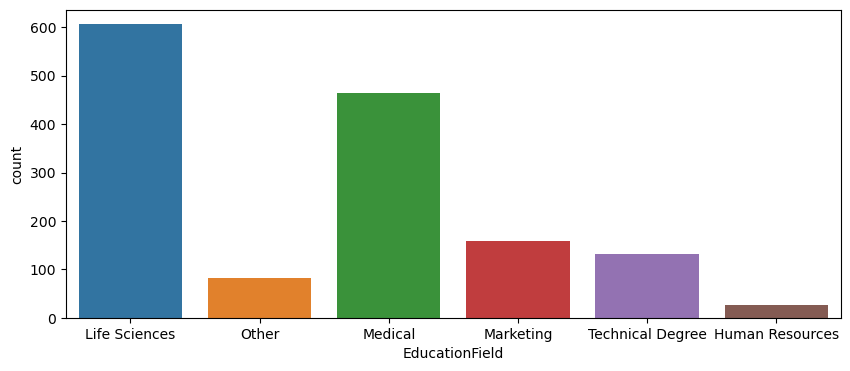

In [12]:
# 생활과학, 의학 계열 교육적 배경을 가진 직원이 많음 -> 생활과학, 의학쪽 도메인으로 추정
display(df["EducationField"].value_counts())

plt.figure(figsize=(10,4))
sns.countplot(x=df["EducationField"])

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot: xlabel='JobRole', ylabel='count'>

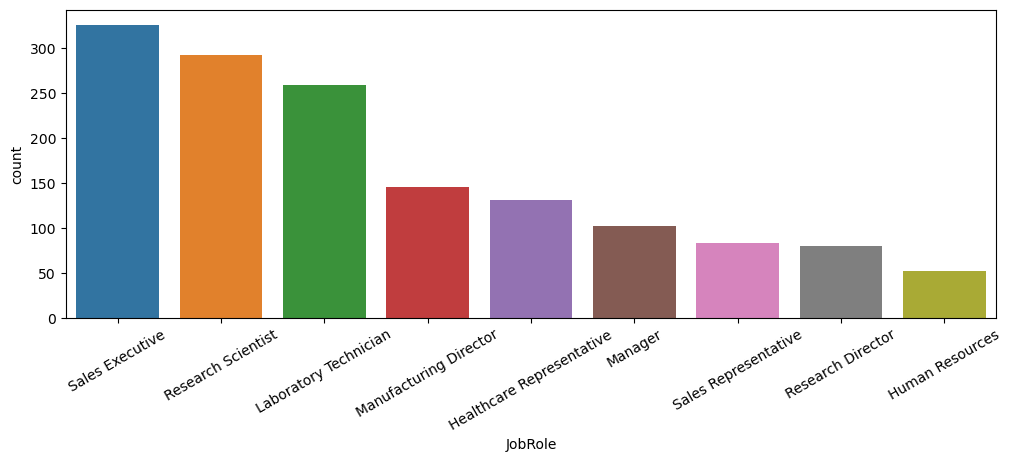

In [13]:
# Sales Executive(영업사원), Research Scientist, Laboratory Technician 순으로 많음. -> 이공계 혹은 의학 계열 제품을 개발하는 회사?
display(df["JobRole"].value_counts())

plt.figure(figsize=(12,4))
plt.xticks(fontsize=10, rotation=30)
sns.countplot(x=df["JobRole"])

# sns.set(font_scale=1.0) <- 이건 x축 제목의 폰트 사이즈 조절

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot: xlabel='MaritalStatus', ylabel='count'>

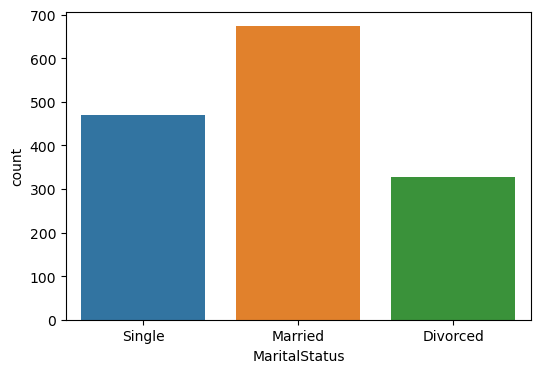

In [14]:
# 기혼자가 많음. 이혼한 직원은 무슨 의미인지? -> 특징 더 살펴보기
display(df["MaritalStatus"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df["MaritalStatus"])

## 수치형 컬럼 확인

In [15]:
# 수치형 컬럼만 출력
df.select_dtypes(exclude="object").head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
2,49,279,8,1,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
4,37,1373,2,2,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
5,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
7,27,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
# 수치형 컬럼의 기술통계값
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


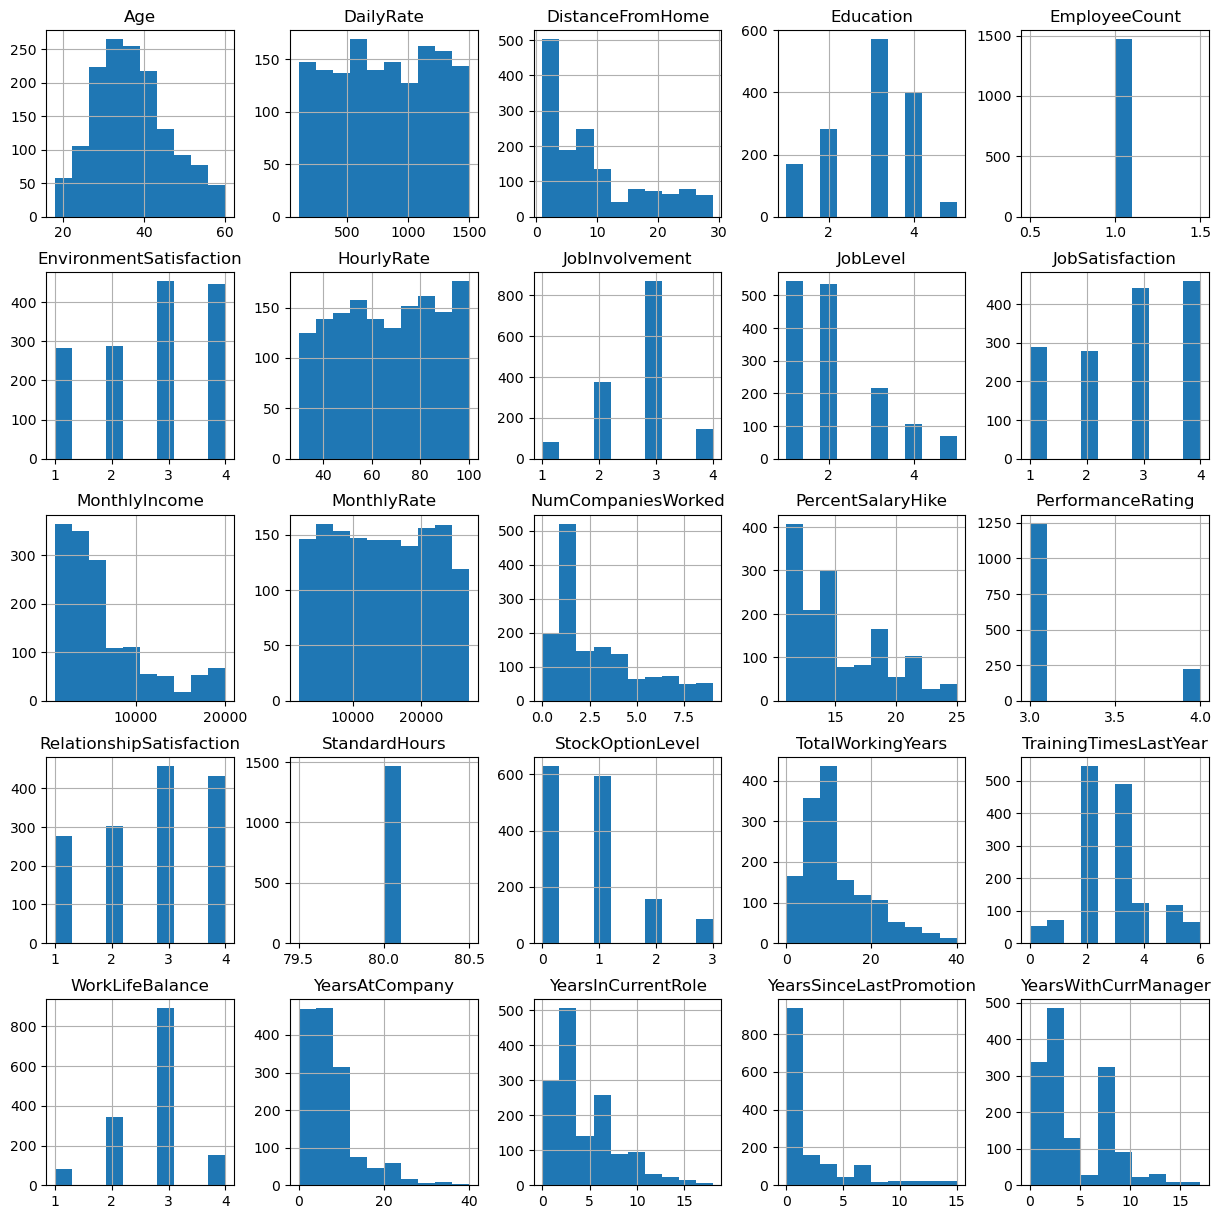

In [17]:
# 수치형 컬럼의 히스토그램

df.hist(figsize=(15,15));

## 불필요한 컬럼 제거
`Over18`, `EmployeeCount`, `StandardHours`, `DailyRate`, `HourlyRate`, `MonthlyRate`

In [19]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [20]:
df["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [21]:
df["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

=> `Over18`, `EmployeeCount`, `StandardHours` : 모두 하나의 값만 존재. 불필요한 컬럼으로 판단.

=> `DailyRate`, `HourlyRate`, `MonthlyRate` : 불분명한 컬럼의 의미. (생략 할지말지 최종 결정. 일요일)

In [22]:
df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours'])
# df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours','DailyRate', 'HourlyRate', 'MonthlyRate'])
df.shape

(1470, 31)

## label 값 분포 확인

In [23]:
# Attrition 분포 -> 불균형 데이터
df["Attrition"].value_counts(1)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<AxesSubplot: xlabel='Attrition', ylabel='count'>

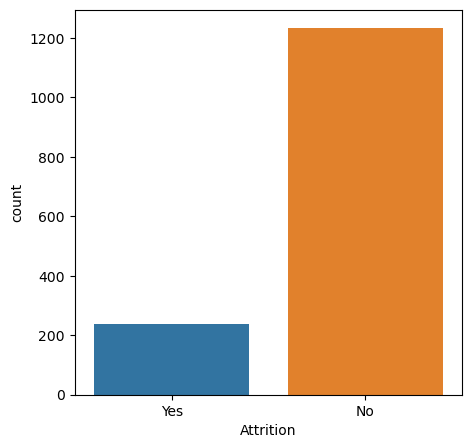

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["Attrition"])

# 파생변수 생성

## 연령대(Age_cat)

In [25]:
# 연령대 함수
def age_categorize(age):
    age = (age//10) * 10
    return age

In [26]:
# '연령대' 컬럼 추가
df['Age_cat'] = df['Age'].apply(age_categorize)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cat
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,40
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,40
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,30
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,30
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,20


In [178]:
df[['Age','Age_cat']].head()

,Age,Age_cat
EmployeeNumber,,
1,41,40
2,49,40
4,37,30
5,33,30
7,27,20


## 경력자 여부 (Experienced)

In [27]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_cat'],
      dtype='object')

**경력직 정의 : `JobLevel` 3 이상 & `TotalWorkingYears` 3년 이상**
* `JobLevel` : Job level at company on a scale of 1 to 5
* `TotalWorkingYears` : Total number of years the employee has worked so far

In [29]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [30]:
df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [32]:
# 경력자만 포함한 데이터프레임
df_exp = df[(df["JobLevel"] >= 3) & (df["TotalWorkingYears"] >= 3)]
df_exp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cat
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,30
20,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,No,11,3,3,1,10,1,3,10,9,8,8,20
23,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,Female,78,2,4,Manager,4,Married,15427,22021,2,No,16,3,3,0,31,3,3,25,8,3,7,50
28,34,No,Travel_Rarely,419,Research & Development,7,4,Life Sciences,1,Female,53,3,3,Research Director,2,Single,11994,21293,0,No,11,3,3,0,13,4,3,12,6,2,11,30
32,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,No,11,3,4,1,26,3,2,14,13,4,8,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,No,23,4,3,1,21,3,3,20,7,0,10,40
2040,35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,3,Female,31,3,3,Human Resources,4,Single,8837,16642,1,Yes,16,3,3,0,9,2,3,9,0,1,7,30
2055,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Yes,13,3,2,1,20,3,3,3,2,2,0,50


In [33]:
df_exp.shape

(393, 32)

In [34]:
# 경력자 여부 컬럼 추가
df['Experienced'] = ['Yes' if (x >= 3 and y >= 3) else 'No' for x, y in zip(df['JobLevel'], df['TotalWorkingYears'])]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cat,Experienced
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,40,No
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,40,No
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,30,No
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,30,No
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,20,No


In [182]:
df[['JobLevel', 'TotalWorkingYears', 'Experienced']].sample(5)

,JobLevel,TotalWorkingYears,Experienced
EmployeeNumber,,,
1084,2,7,No
824,1,10,No
184,2,12,No
1719,4,21,Yes
86,3,25,Yes


In [35]:
# 사내 경력자 비율 : 약 27%
df['Experienced'].value_counts(1)

No     0.732653
Yes    0.267347
Name: Experienced, dtype: float64

## 연봉

In [36]:
df["AnnualIncome"] = df["MonthlyIncome"] * 12

In [37]:
df["AnnualIncome"].describe()

count      1470.000000
mean      78035.175510
std       56495.481397
min       12108.000000
25%       34932.000000
50%       59028.000000
75%      100548.000000
max      239988.000000
Name: AnnualIncome, dtype: float64

## 변수간 상관관계 확인

C:\Users\Owner\AppData\Local\Temp\ipykernel_27420\2532515197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\Owner\AppData\Local\Temp\ipykernel_27420\2532515197.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


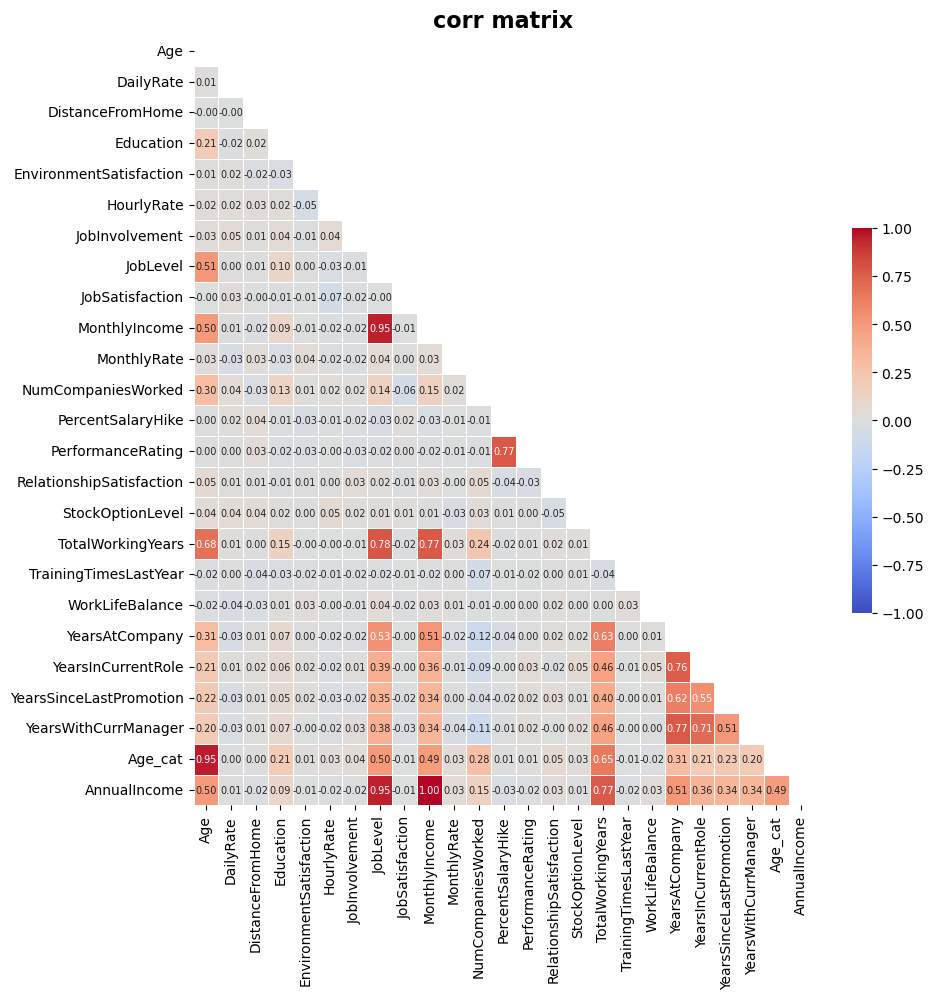

In [77]:
# 상관관계 히트맵
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'coolwarm', 
            annot = True,   # 실제 값을 표시한다
            annot_kws={'size' : 7}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.2f',    # annot 소수점 2자리까지
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('corr matrix', fontweight="bold", fontsize=16)
plt.show()

# 분석 주제1. 경력에 따른 퇴사 여부
주요 컬럼 : `JobLevel`, `NumCompaniesWorked`, `TotalWorkingYears`, `YearsAtCompany`, `YearsWithCurrManager`

## 근무 년수에 따른 퇴사 비율

<AxesSubplot: >

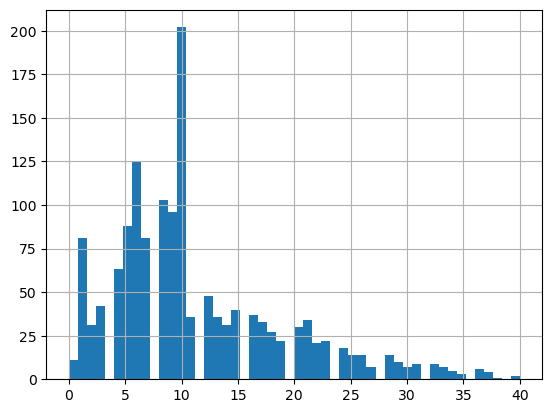

In [38]:
df['TotalWorkingYears'].hist(bins=50)

In [39]:
# 5년마다 TotalWorkingYears 나누고 퇴사 비율 구하기

df['TotalWorkingYears_Group'] = pd.cut(df['TotalWorkingYears'], bins=range(0, df['TotalWorkingYears'].max()+6, 5), right=False)
df[['TotalWorkingYears', 'TotalWorkingYears_Group']].head()

,TotalWorkingYears,TotalWorkingYears_Group
EmployeeNumber,,
1,8,"[5, 10)"
2,10,"[10, 15)"
4,7,"[5, 10)"
5,8,"[5, 10)"
7,6,"[5, 10)"


In [40]:
df_exp_attr = df.groupby('TotalWorkingYears_Group').agg({"Attrition":"value_counts"})
df_exp_attr

Attrition
TotalWorkingYears_Group Attrition           
[0, 5)                  No               153
                        Yes               75
[5, 10)                 No               411
                        Yes               82
[10, 15)                No               309
                        Yes               44
[15, 20)                No               141
                        Yes               18
[20, 25)                No               115
                        Yes               10
[25, 30)                No                56
                        Yes                3
[30, 35)                No                34
                        Yes                3
[35, 40)                No                14
[40, 45)                Yes                2

In [41]:
# TotalWorkingYears 그룹별 퇴사비율
attr_dict = {'attr_0to4': (df_exp_attr.iloc[1,:] / (df_exp_attr.iloc[0,:] + df_exp_attr.iloc[1,:])),
             'attr_5to9': (df_exp_attr.iloc[3,:] / (df_exp_attr.iloc[2,:] + df_exp_attr.iloc[3,:])),             
             'attr_10to14': (df_exp_attr.iloc[5,:] / (df_exp_attr.iloc[4,:] + df_exp_attr.iloc[5,:])),
             'attr_15to19': (df_exp_attr.iloc[7,:] / (df_exp_attr.iloc[6,:] + df_exp_attr.iloc[7,:])),
             'attr_20to24': (df_exp_attr.iloc[9,:] / (df_exp_attr.iloc[8,:] + df_exp_attr.iloc[9,:])),
             'attr_25to29': (df_exp_attr.iloc[11,:] / (df_exp_attr.iloc[10,:] + df_exp_attr.iloc[11,:])),
             'attr_30to34': (df_exp_attr.iloc[13,:] / (df_exp_attr.iloc[12,:] + df_exp_attr.iloc[13,:])),
             'attr_35to39': 0,
             'attr_40to44': 1}
attr_dict

{'attr_0to4': Attrition    0.328947
 dtype: float64,
 'attr_5to9': Attrition    0.166329
 dtype: float64,
 'attr_10to14': Attrition    0.124646
 dtype: float64,
 'attr_15to19': Attrition    0.113208
 dtype: float64,
 'attr_20to24': Attrition    0.08
 dtype: float64,
 'attr_25to29': Attrition    0.050847
 dtype: float64,
 'attr_30to34': Attrition    0.081081
 dtype: float64,
 'attr_35to39': 0,
 'attr_40to44': 1}

In [42]:
df_attr_ratio = pd.DataFrame(attr_dict)
df_attr_ratio

,attr_0to4,attr_5to9,attr_10to14,attr_15to19,attr_20to24,attr_25to29,attr_30to34,attr_35to39,attr_40to44
Attrition,0.328947,0.166329,0.124646,0.113208,0.08,0.050847,0.081081,0,1


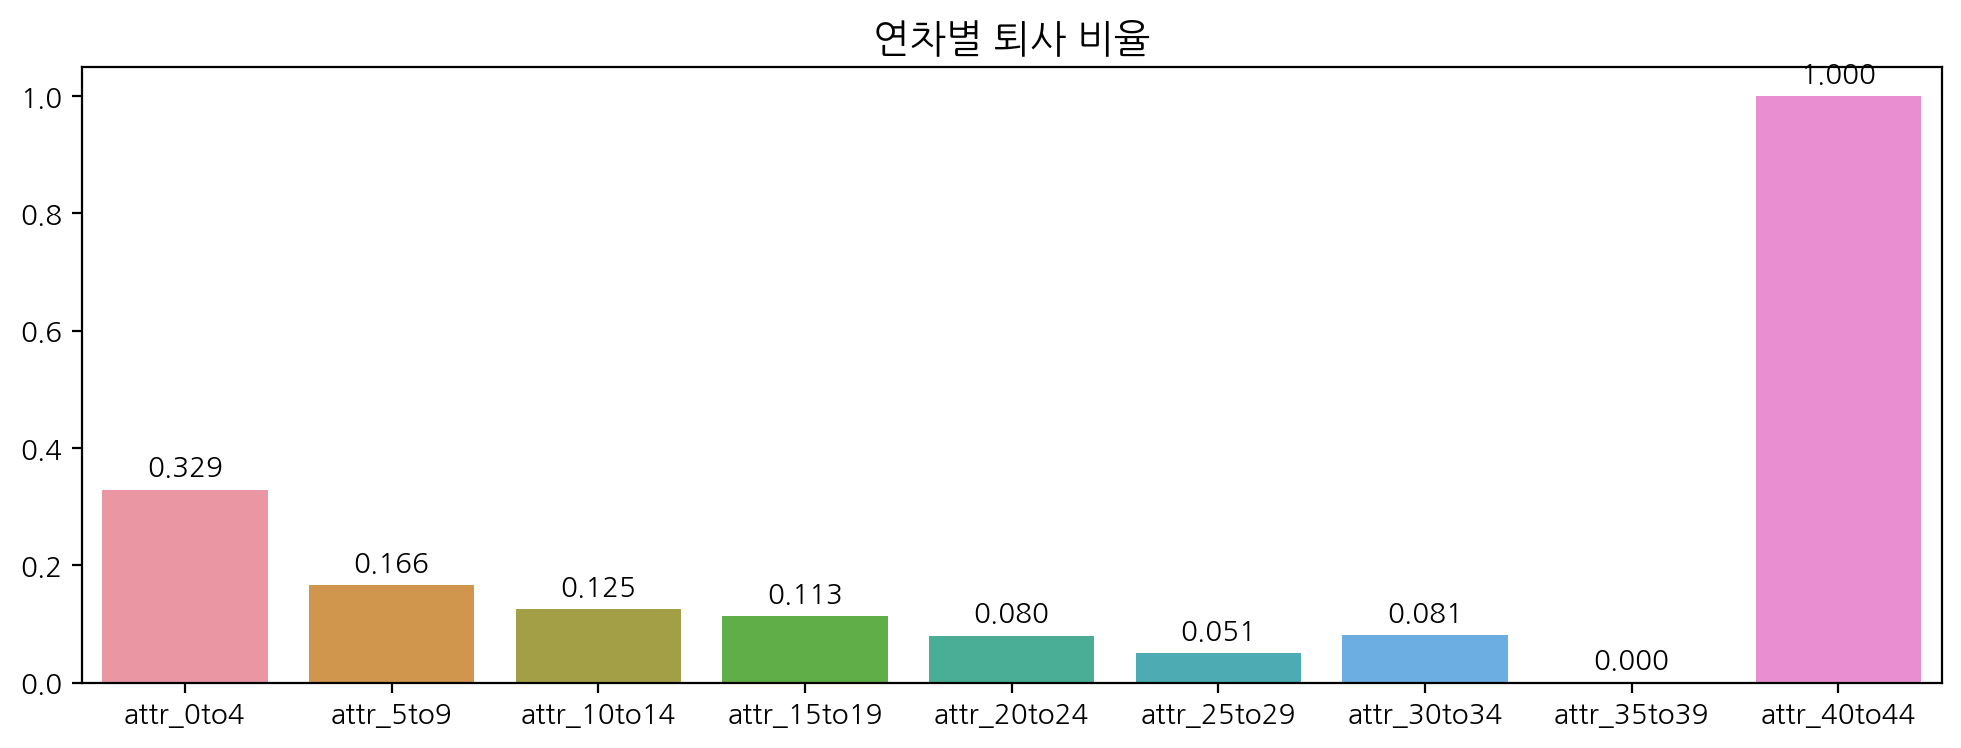

In [146]:
plt.figure(figsize=(12,4))
ax = sns.barplot(df_attr_ratio)
ax.set_title('연차별 퇴사 비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

**Q. 근무 년수가 오래될수록 퇴사를 많이하는가?**

A. 근무 년수가 오래될수록 퇴사비율이 낮아짐. 특이한 점은 35-39년차는 퇴사한 사람이 아예 없고, 40-44년차는 2명 모두 퇴사.

그렇다면, 연차가 낮을수록 퇴사를 왜 많이 하는가?
40-44년차 2명 모두 퇴사한 이유는 무엇인가?

## joblevel에 따른 퇴사 비율

In [192]:
# joblevel에 따른 퇴사 여부

df_jl_attr = df.groupby('JobLevel').agg({'Attrition':'value_counts'})
df_jl_attr

Attrition
JobLevel Attrition           
1        No               400
         Yes              143
2        No               482
         Yes               52
3        No               186
         Yes               32
4        No               101
         Yes                5
5        No                64
         Yes                5

In [193]:
attr_jl_dict = {'attr_jl1': (df_jl_attr.iloc[1,:] / (df_jl_attr.iloc[0,:] + df_jl_attr.iloc[1,:])),
             'attr_jl2': (df_jl_attr.iloc[3,:] / (df_jl_attr.iloc[2,:] + df_jl_attr.iloc[3,:])),             
             'attr_jl3': (df_jl_attr.iloc[5,:] / (df_jl_attr.iloc[4,:] + df_jl_attr.iloc[5,:])),
             'attr_jl4': (df_jl_attr.iloc[7,:] / (df_jl_attr.iloc[6,:] + df_jl_attr.iloc[7,:])),
             'attr_jl5': (df_jl_attr.iloc[9,:] / (df_jl_attr.iloc[8,:] + df_jl_attr.iloc[9,:]))}
attr_jl_dict

{'attr_jl1': Attrition    0.263352
 dtype: float64,
 'attr_jl2': Attrition    0.097378
 dtype: float64,
 'attr_jl3': Attrition    0.146789
 dtype: float64,
 'attr_jl4': Attrition    0.04717
 dtype: float64,
 'attr_jl5': Attrition    0.072464
 dtype: float64}

In [194]:
df_attr_jl_ratio = pd.DataFrame(attr_jl_dict)
df_attr_jl_ratio

,attr_jl1,attr_jl2,attr_jl3,attr_jl4,attr_jl5
Attrition,0.263352,0.097378,0.146789,0.04717,0.072464


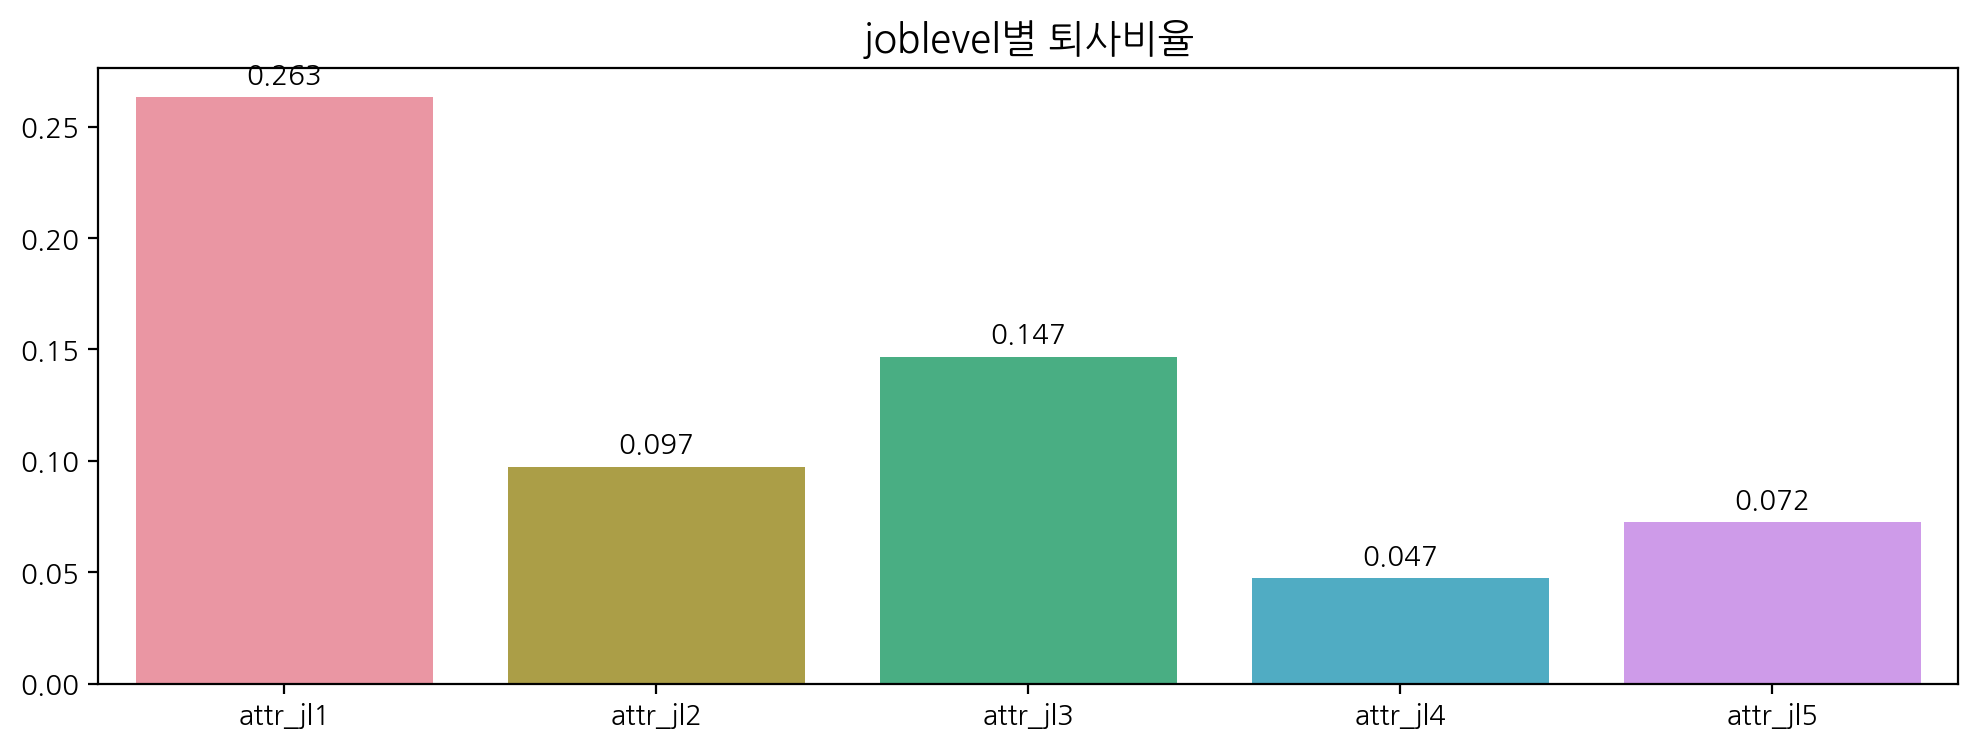

In [196]:
# joblevel별 퇴사비율
plt.figure(figsize=(12,4))
ax = sns.barplot(df_attr_jl_ratio)
ax.set_title('joblevel별 퇴사비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

<AxesSubplot: xlabel='JobLevel', ylabel='Count'>

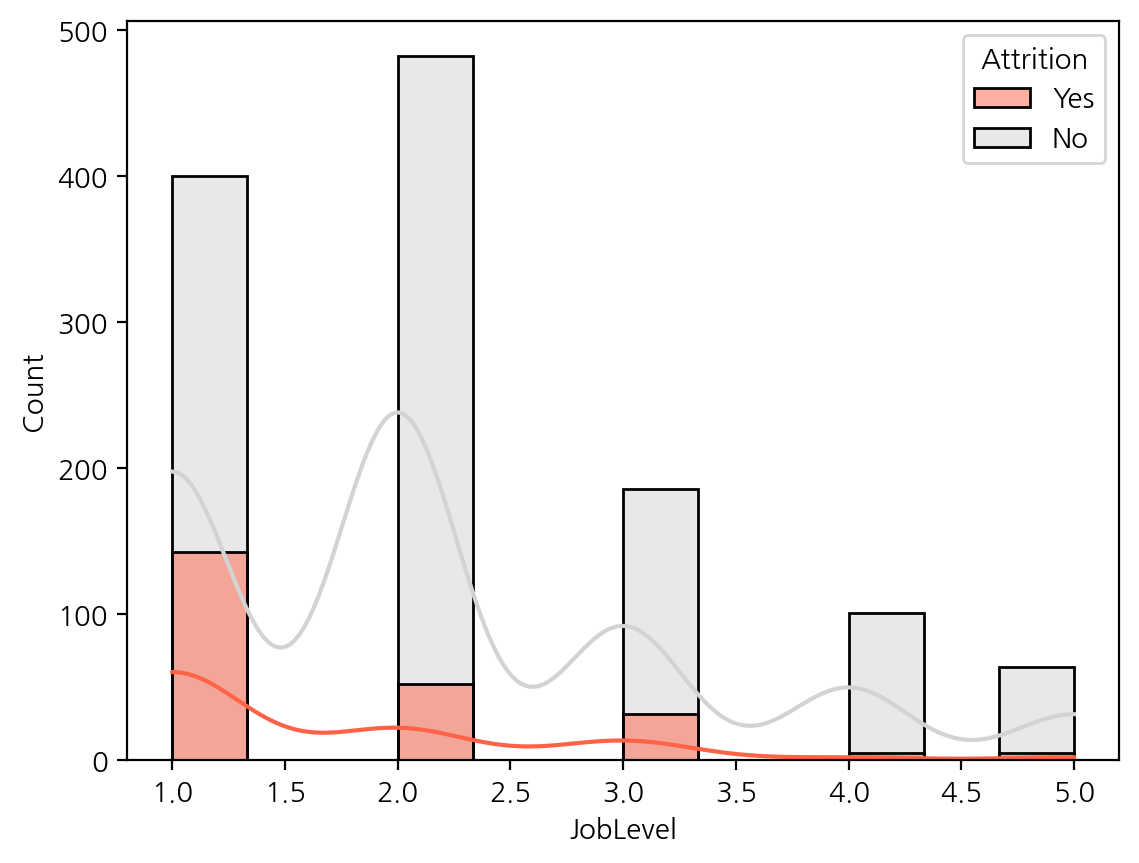

In [191]:
sns.histplot(data=df, x='JobLevel', hue='Attrition', kde=True)

Text(0.5, 1.0, '퇴사 여부에 따른 JobLevel 분포')

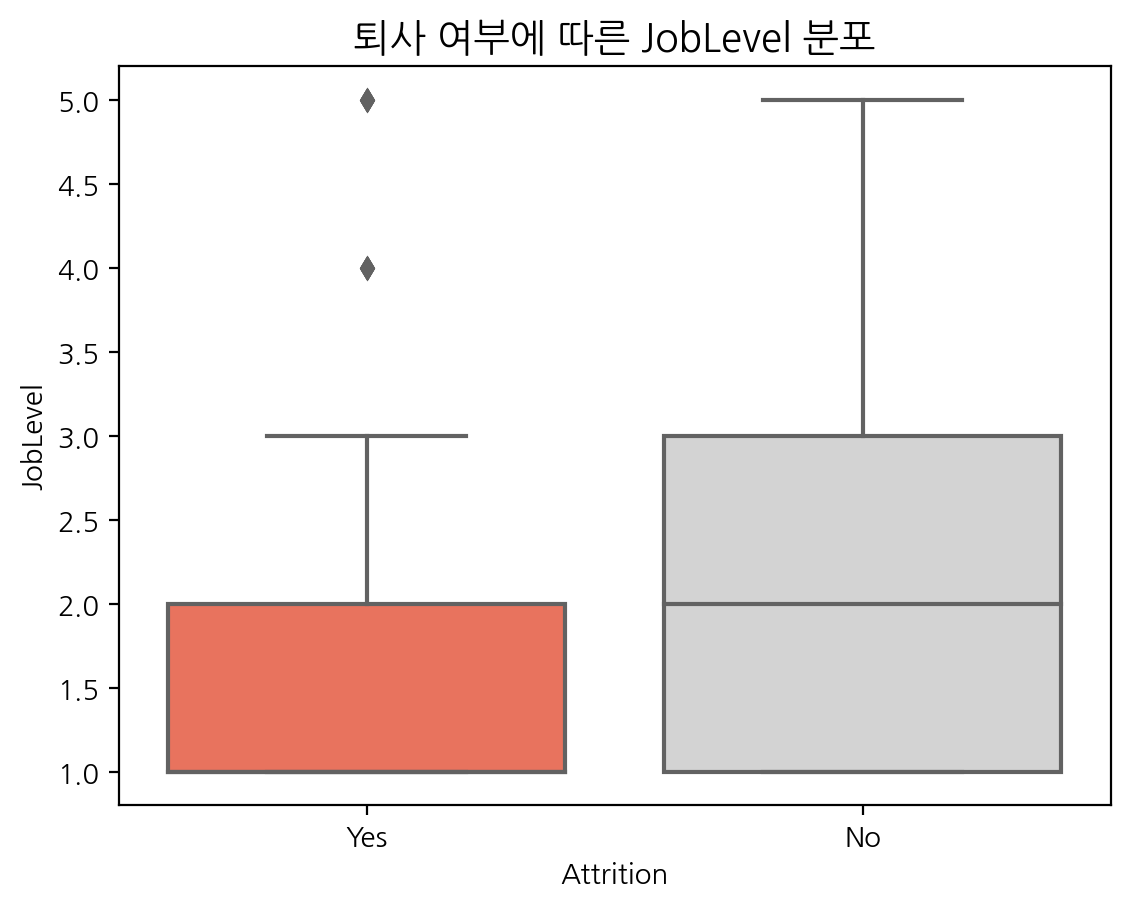

In [186]:
ax = sns.boxplot(data=df, x='Attrition', y='JobLevel')
ax.set_title('퇴사 여부에 따른 JobLevel 분포', fontsize=14)

In [ ]:
# joblevel이 높은데 퇴사를 하는 사람 -> 이상치 -> 왜??

## 연차별 만족도 비교

In [44]:
# 연차별 만족도 비교
df_exp_eval = df.groupby('TotalWorkingYears_Group').agg({"EnvironmentSatisfaction":"mean",
                                           "JobSatisfaction":"mean",
                                          "RelationshipSatisfaction":"mean",
                                          "WorkLifeBalance":"mean"})
df_exp_eval

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
TotalWorkingYears_Group,,,,
"[0, 5)",2.850877,2.785088,2.736842,2.754386
"[5, 10)",2.701826,2.711968,2.713996,2.758621
"[10, 15)",2.679887,2.790368,2.628895,2.739377
"[15, 20)",2.679245,2.647799,2.691824,2.836478
"[20, 25)",2.712000,2.600000,2.848000,2.816000
"[25, 30)",2.576271,2.745763,2.779661,2.644068
"[30, 35)",2.864865,2.810811,2.783784,2.783784
"[35, 40)",3.000000,2.571429,2.714286,2.642857
"[40, 45)",4.000000,3.000000,4.000000,2.500000


<Figure size 1200x500 with 0 Axes>

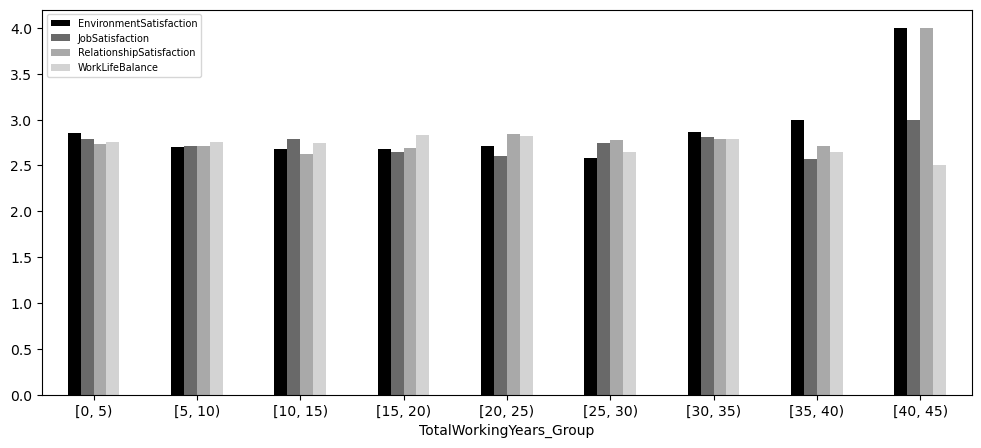

In [45]:
# 연차별 만족도 비교 시각화
# -> 0~4년차의 만족도가 크게 낮지 않음. 
# -> 40~44년차는 근무환경, 관계에 관한 만족도가 상당히 높은 편.
# => 만족도로서는 퇴사 원인을 파악할 수 없었음.

plt.figure(figsize=(12,5))
colors = ['black','dimgrey','darkgray','lightgrey']
df_exp_eval.reset_index().plot.bar(x='TotalWorkingYears_Group', color=colors, rot=0, figsize=(12,5))
plt.legend(fontsize = 7)

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='WorkLifeBalance'>

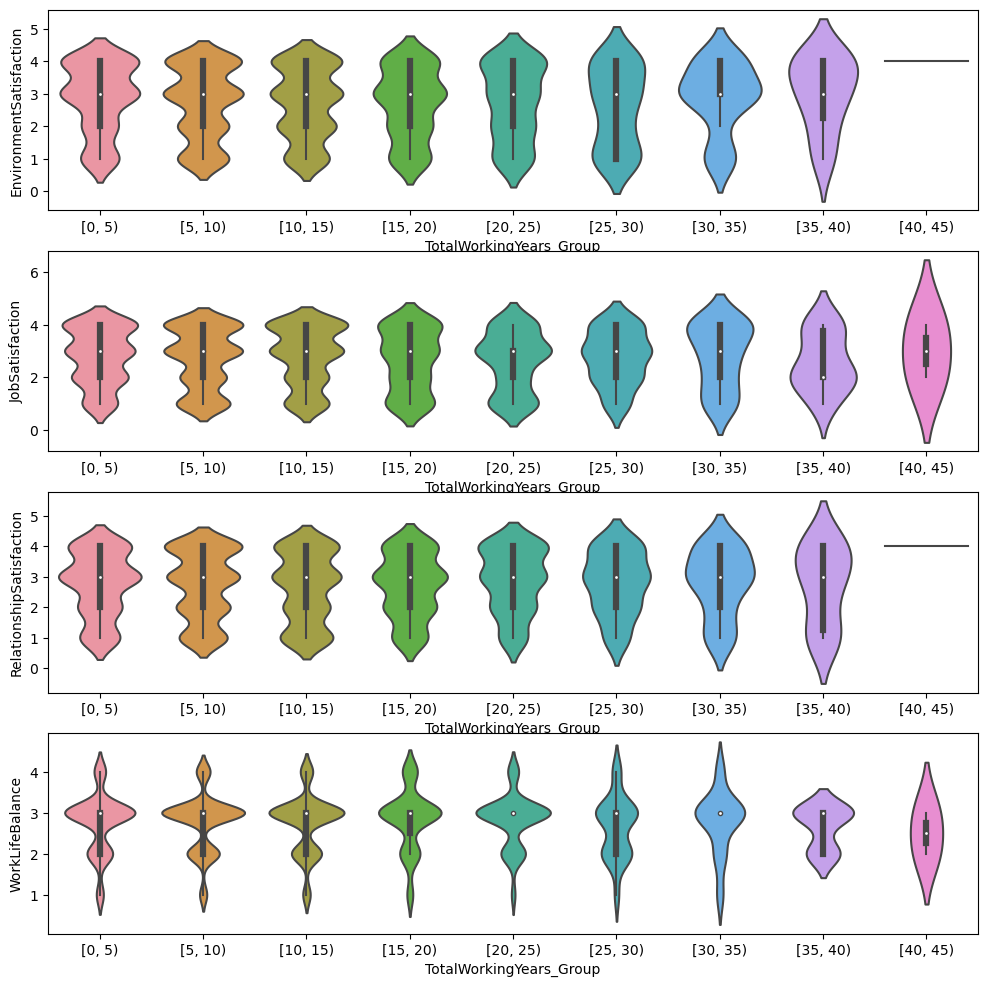

In [110]:
# 연차별 만족도 비교 시각화

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.violinplot(data=df, x='TotalWorkingYears_Group', y="EnvironmentSatisfaction", ax=axes[0])
sns.violinplot(data=df, x='TotalWorkingYears_Group', y="JobSatisfaction", ax=axes[1])
sns.violinplot(data=df, x='TotalWorkingYears_Group', y="RelationshipSatisfaction", ax=axes[2])
sns.violinplot(data=df, x='TotalWorkingYears_Group', y="WorkLifeBalance", ax=axes[3])

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='WorkLifeBalance'>

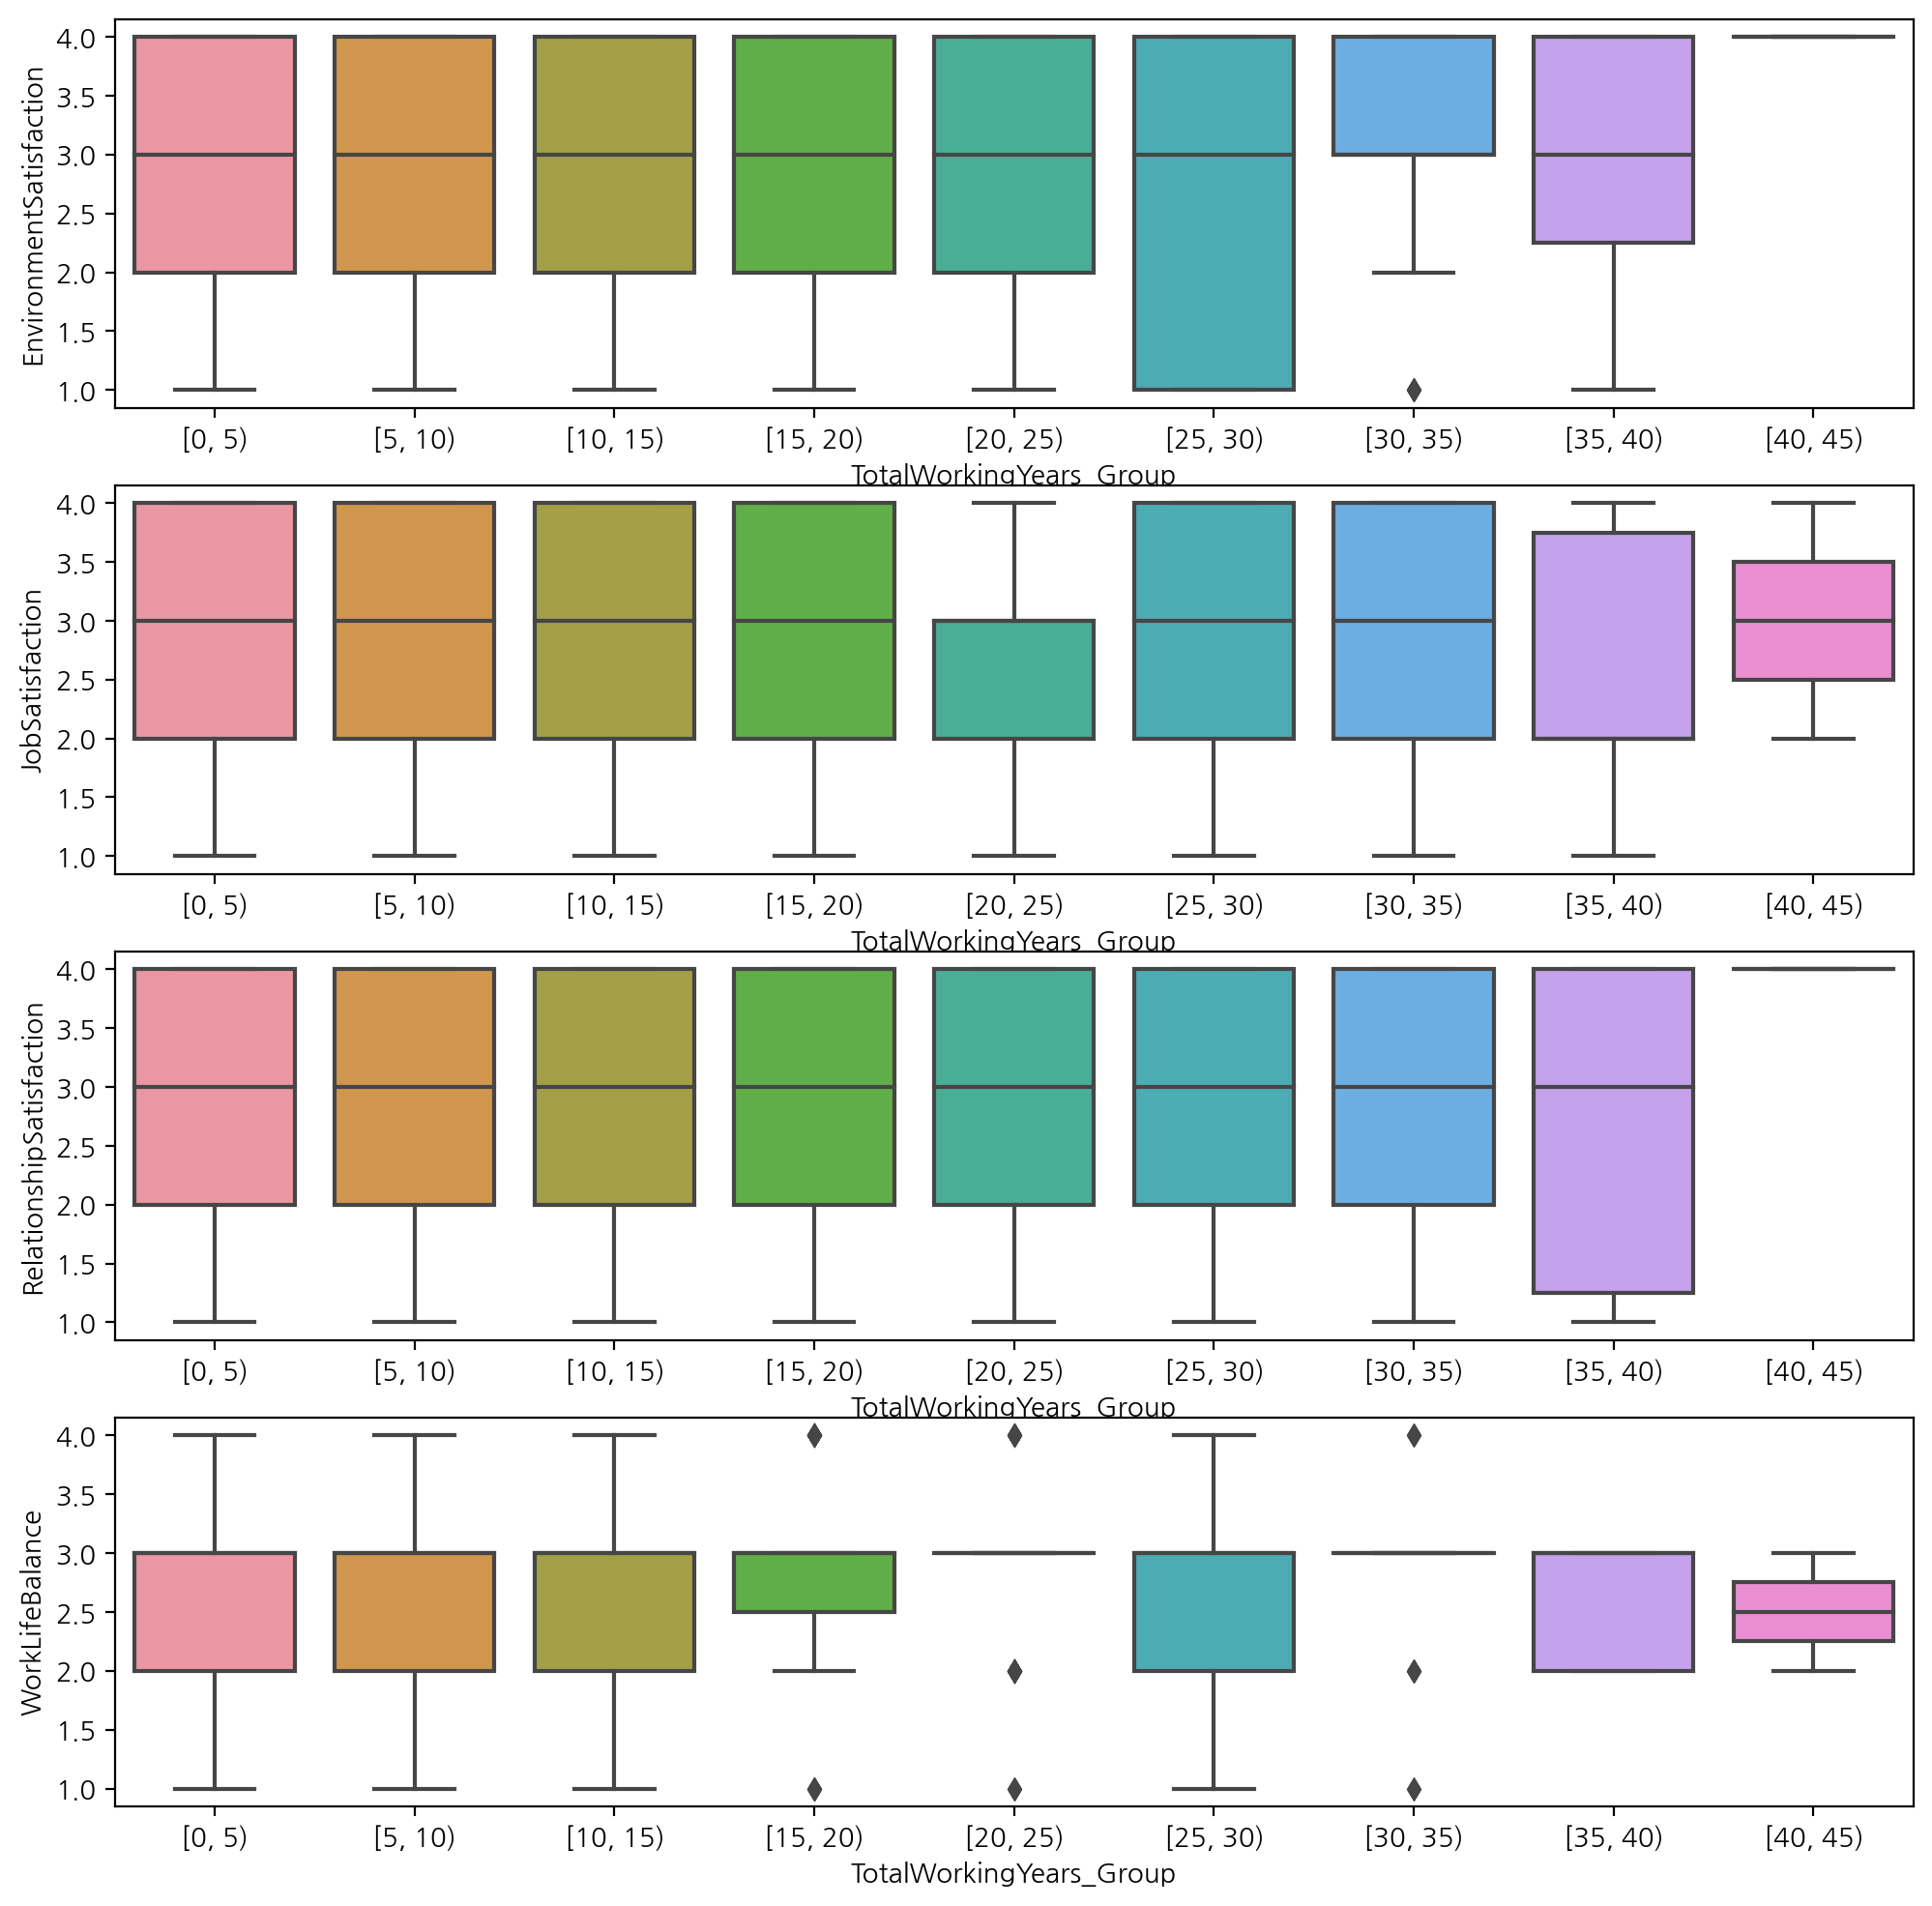

In [197]:
# 연차별 만족도 비교 시각화

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.boxplot(data=df, x='TotalWorkingYears_Group', y="EnvironmentSatisfaction", ax=axes[0])
sns.boxplot(data=df, x='TotalWorkingYears_Group', y="JobSatisfaction", ax=axes[1])
sns.boxplot(data=df, x='TotalWorkingYears_Group', y="RelationshipSatisfaction", ax=axes[2])
sns.boxplot(data=df, x='TotalWorkingYears_Group', y="WorkLifeBalance", ax=axes[3])

## 연차별 인구통계학적 정보 비교

In [46]:
# 연차별 인구통계학적 정보 비교
df_exp_demo = df.groupby('TotalWorkingYears_Group').agg({"Age":"mean",
                                           "DistanceFromHome":"mean"})
df_exp_demo

,Age,DistanceFromHome
TotalWorkingYears_Group,,
"[0, 5)",28.622807,8.390351
"[5, 10)",34.206897,9.350913
"[10, 15)",36.991501,9.164306
"[15, 20)",40.905660,10.100629
"[20, 25)",44.784000,9.784000
"[25, 30)",48.644068,8.288136
"[30, 35)",53.216216,7.027027
"[35, 40)",55.214286,10.857143
"[40, 45)",58.000000,12.500000


<Figure size 1200x500 with 0 Axes>

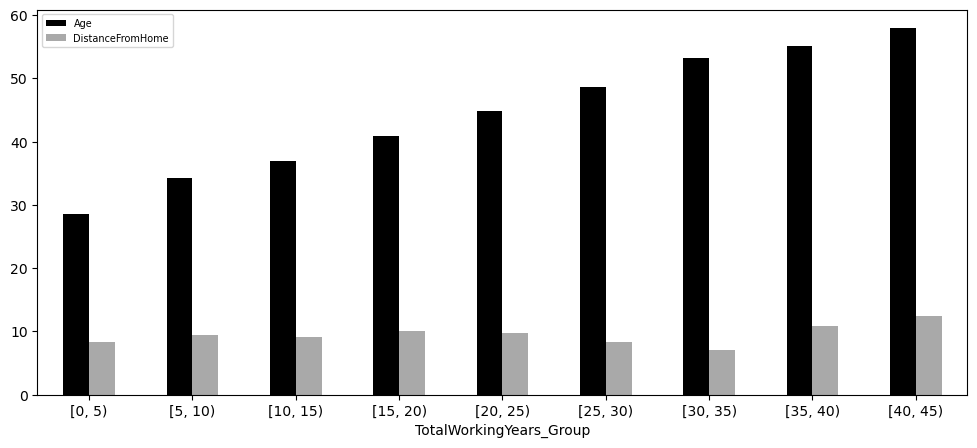

In [47]:
# 연차별 인구통계학적 정보 비교 시각화
# -> 연차가 낮을수록 평균 나이가 적음 (일반적으로 당연)
# -> 연차별 통근거리에 대해 큰 차이 없음. 30~34년차의 경우 통근거리가 가장 가까움

plt.figure(figsize=(12,5))
colors = ['black', 'darkgray']
df_exp_demo.reset_index().plot.bar(x='TotalWorkingYears_Group', color=colors, rot=0, figsize=(12,5))
plt.legend(fontsize = 7)

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='DistanceFromHome'>

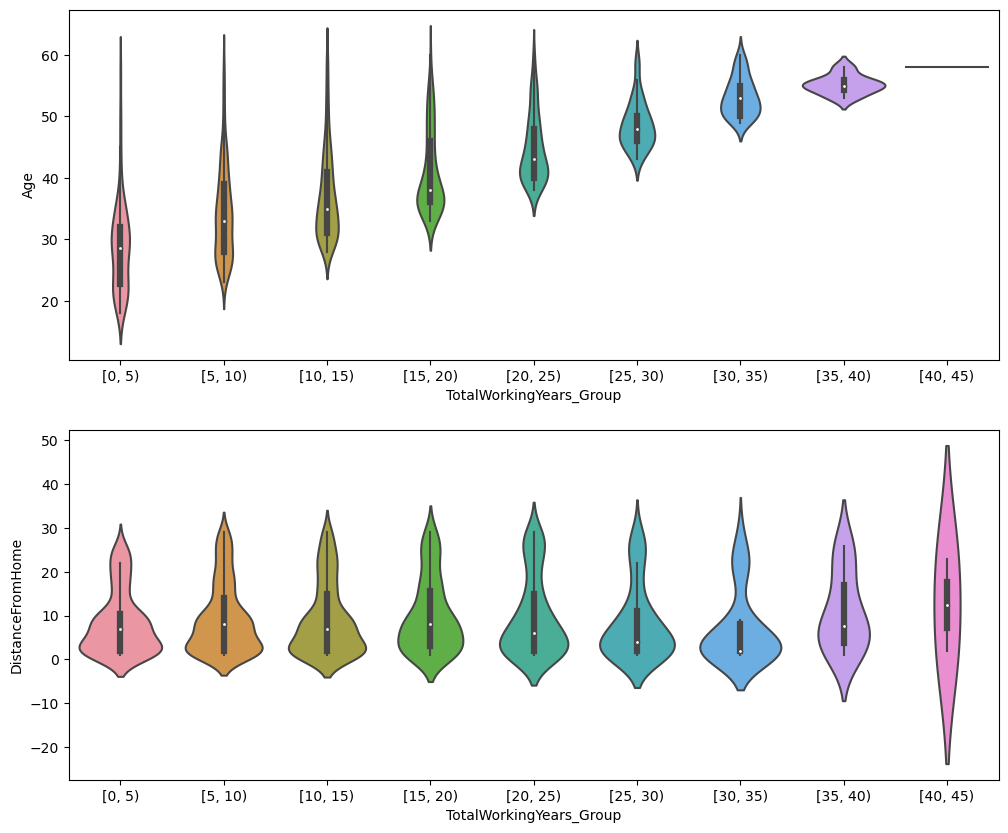

In [94]:
# 연차별 인구통계학적 정보 비교 시각화

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.violinplot(data=df, x='TotalWorkingYears_Group', y="Age", ax=axes[0])
sns.violinplot(data=df, x='TotalWorkingYears_Group', y="DistanceFromHome", ax=axes[1])

In [205]:
# 실제로 5년 미만 연차의 직원은 연령대 폭이 매우 큼
df.loc[df["TotalWorkingYears"] < 5, 'Age'].describe()

count    228.000000
mean       8.390351
std        7.255640
min        1.000000
25%        2.000000
50%        7.000000
75%       10.250000
max       26.000000
Name: DistanceFromHome, dtype: float64

In [207]:
df.loc[df["TotalWorkingYears"] >= 40, 'DistanceFromHome']

EmployeeNumber
165    23
825     2
Name: DistanceFromHome, dtype: int64

In [63]:
# 연차별 교육 비교
df_exp_edu = df.groupby('TotalWorkingYears_Group').agg({"TrainingTimesLastYear":"mean",
                                                       "Education":"mean"})
df_exp_edu

,TrainingTimesLastYear,Education
TotalWorkingYears_Group,,
"[0, 5)",2.793860,2.557018
"[5, 10)",2.839757,2.841785
"[10, 15)",2.838527,3.062323
"[15, 20)",2.742138,3.150943
"[20, 25)",2.752000,2.912000
"[25, 30)",2.711864,2.932203
"[30, 35)",2.702703,3.243243
"[35, 40)",2.214286,3.642857
"[40, 45)",2.500000,4.000000


<Figure size 1200x500 with 0 Axes>

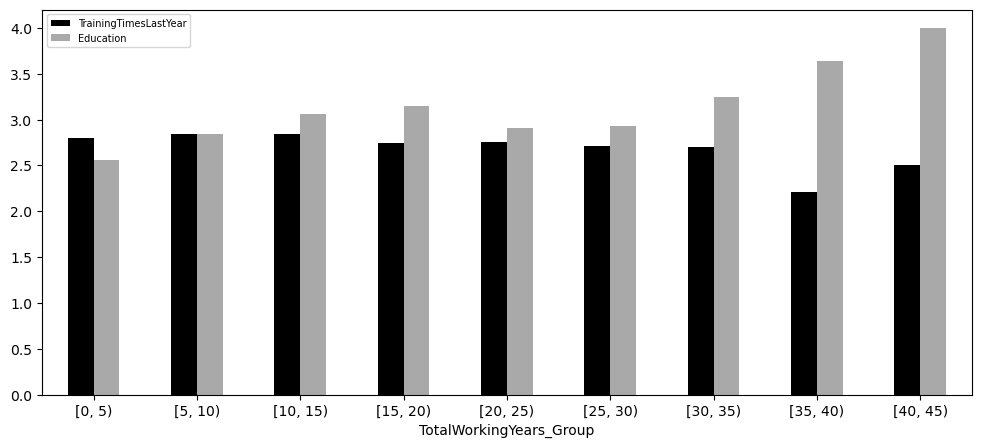

In [64]:
# 연차별 교육 비교 시각화
# -> 연차별 작년 교육 횟수에 큰 차이 없음. 35년차 이상은 교육을 받은 횟수가 다른 년차 그룹보다 적음
# -> 연차가 높을수록 교육수준이 높음. 0~4년차의 교육 수준이 가장 낮음.

plt.figure(figsize=(12,5))
colors = ['black', 'darkgray']
df_exp_edu.reset_index().plot.bar(x='TotalWorkingYears_Group', color=colors, rot=0, figsize=(12,5))
plt.legend(fontsize = 7)

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='Education'>

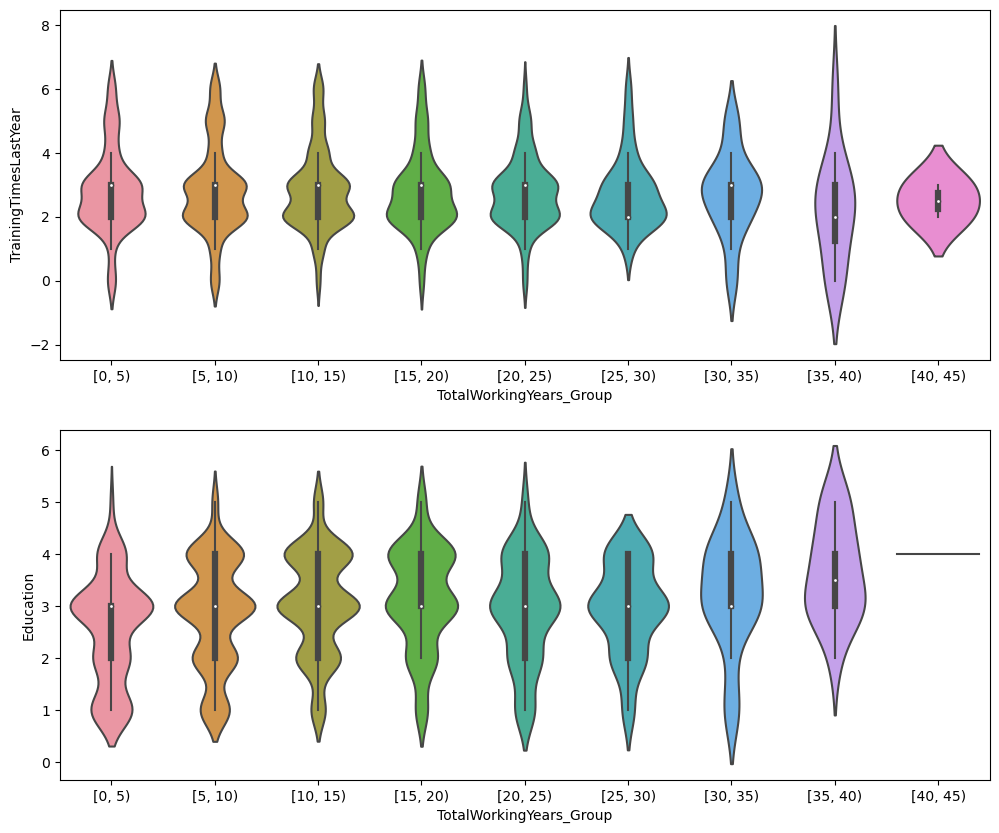

In [95]:
# 연차별 교육 정보 비교 시각화

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.violinplot(data=df, x='TotalWorkingYears_Group', y="TrainingTimesLastYear", ax=axes[0])
sns.violinplot(data=df, x='TotalWorkingYears_Group', y="Education", ax=axes[1])

In [96]:
# 연차별 직무 수준 비교
df_exp_jl = df.groupby('TotalWorkingYears_Group').agg({"JobLevel":"mean"})
df_exp_jl

,JobLevel
TotalWorkingYears_Group,
"[0, 5)",1.100877
"[5, 10)",1.567951
"[10, 15)",2.084986
"[15, 20)",2.207547
"[20, 25)",3.664000
"[25, 30)",4.118644
"[30, 35)",4.189189
"[35, 40)",4.214286
"[40, 45)",4.000000


<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='JobLevel'>

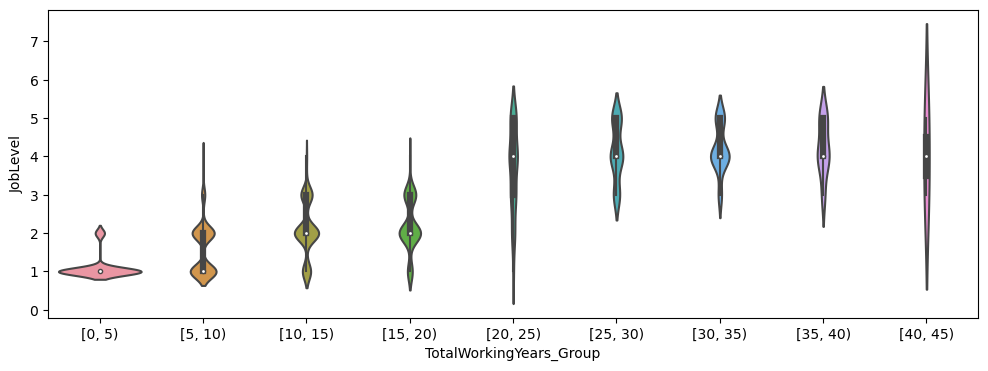

In [109]:
# 연차별 직무 수준 비교 시각화
plt.figure(figsize=(12,4))

sns.violinplot(data=df, x='TotalWorkingYears_Group', y="JobLevel")

In [209]:
df.loc[(df['TotalWorkingYears'] >= 20) & (df['TotalWorkingYears'] < 25), 'JobLevel'].value_counts()

4    44
5    32
3    28
2    17
1     4
Name: JobLevel, dtype: int64

In [210]:
df.loc[(df['TotalWorkingYears'] >= 40), 'JobLevel'].value_counts()

3    1
5    1
Name: JobLevel, dtype: int64

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='JobLevel'>

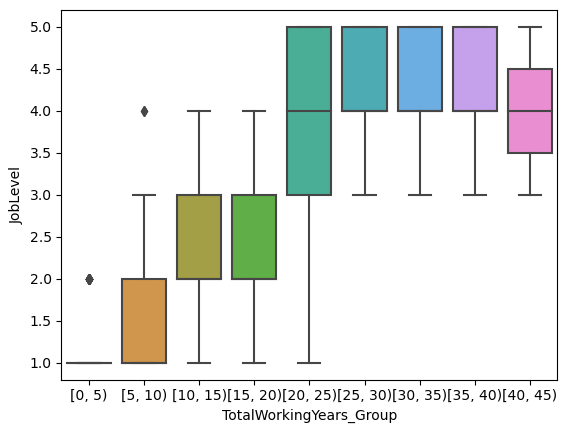

In [105]:
sns.boxplot(data=df, x='TotalWorkingYears_Group', y="JobLevel")

<AxesSubplot: xlabel='TotalWorkingYears', ylabel='JobLevel'>

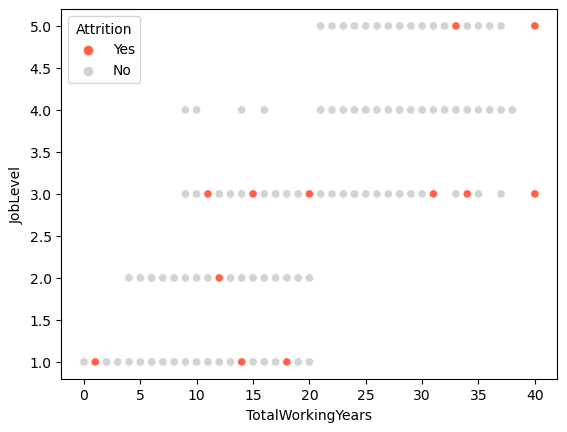

In [48]:
# 망한 시각화?
colors = ["#FF6347", "#D3D3D3"]
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(df, x='TotalWorkingYears', y='JobLevel', hue='Attrition')

## 비경력직, 경력직의 퇴사 비율
(경력직 : JobLevel 3 이상, TotalWorkingYears 3년 이상)

<AxesSubplot: xlabel='Experienced', ylabel='count'>

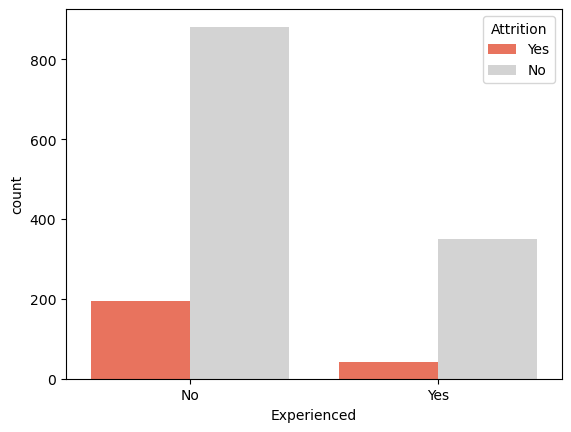

In [49]:
# 비경력직, 경력직의 퇴사 현황
sns.countplot(df, x='Experienced', hue='Attrition')

In [50]:
df_exp_attr = df.groupby('Experienced').agg({"Attrition":"value_counts"})
df_exp_attr

Attrition
Experienced Attrition           
No          No               882
            Yes              195
Yes         No               351
            Yes               42

In [51]:
# 비경력직의 퇴사비율
df_exp_attr["Attrition"][1]/df_exp_attr.loc["No"].sum()

Attrition    0.181058
dtype: float64

In [52]:
# 경력직의 퇴사비율
df_exp_attr["Attrition"][3]/df_exp_attr.loc["Yes"].sum()

Attrition    0.10687
dtype: float64

**결론**

: 비경력직의 퇴사 비율이 더 높다.

## 경력직 비율이 높은 부서는 어디인가?

In [53]:
df_exp_dpt = df.groupby('Department').agg({"Experienced":"value_counts"})
df_exp_dpt

Experienced
Department             Experienced             
Human Resources        No                    46
                       Yes                   17
Research & Development No                   715
                       Yes                  246
Sales                  No                   316
                       Yes                  130

In [111]:
# 부서별 경력직 비율
exp_dict = {'HR_ExpRatio': (df_exp_dpt.iloc[1,:] / (df_exp_dpt.iloc[0,:] + df_exp_dpt.iloc[1,:])),
             'RnD_ExpRatio': (df_exp_dpt.iloc[3,:] / (df_exp_dpt.iloc[2,:] + df_exp_dpt.iloc[3,:])),             
             'Sales_ExpRatio': (df_exp_dpt.iloc[5,:] / (df_exp_dpt.iloc[4,:] + df_exp_dpt.iloc[5,:]))}
exp_dict

{'HR_ExpRatio': Experienced    0.269841
 dtype: float64,
 'RnD_ExpRatio': Experienced    0.255983
 dtype: float64,
 'Sales_ExpRatio': Experienced    0.29148
 dtype: float64}

In [112]:
df_dp_exp_ratio = pd.DataFrame(exp_dict)
df_dp_exp_ratio

,HR_ExpRatio,RnD_ExpRatio,Sales_ExpRatio
Experienced,0.269841,0.255983,0.29148


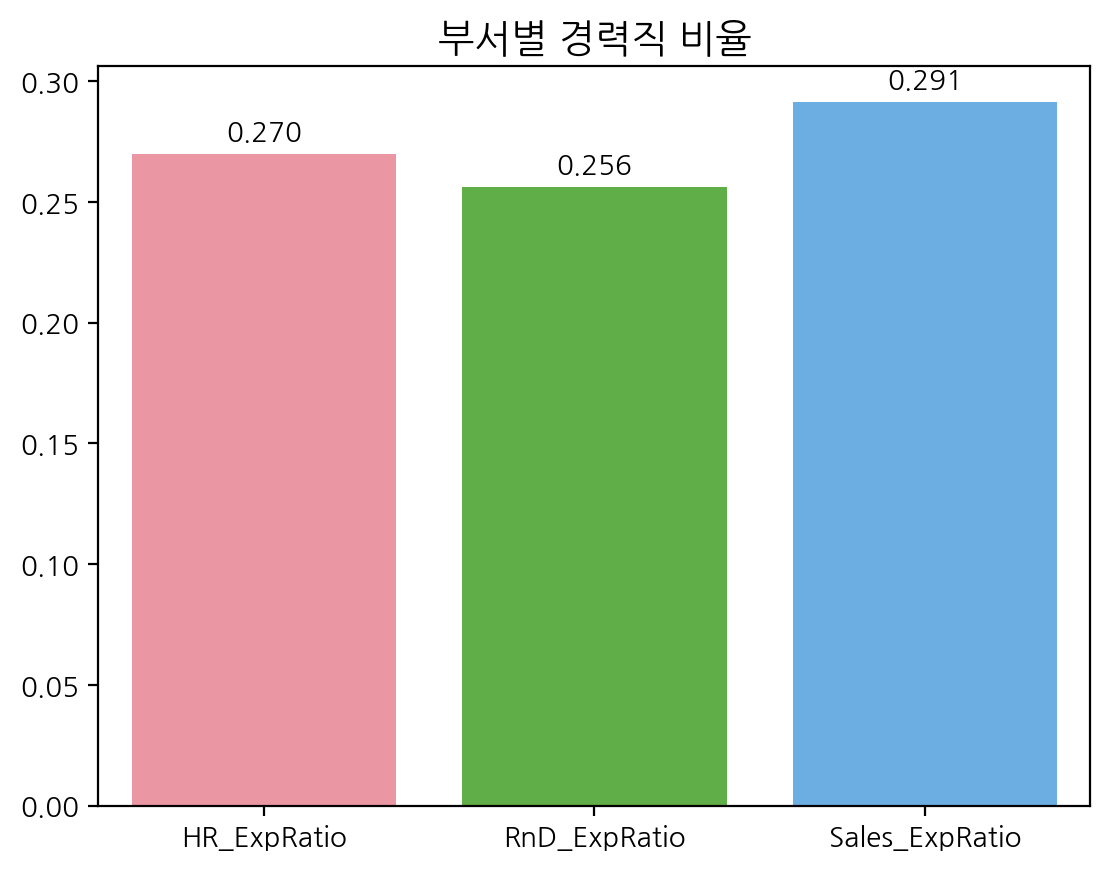

In [147]:
# Sales, HR, RnD 순으로 경력직의 비율이 높음

ax = sns.barplot(data=df_dp_exp_ratio)
ax.set_title('부서별 경력직 비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

In [131]:
# 퇴사한 사람들의 이전 직장 개수
# -> 퇴사한 사람일수록 이전 근무 직장의 개수가 많음
df.groupby('Attrition').agg({'NumCompaniesWorked':'mean'})

,NumCompaniesWorked
Attrition,
No,2.645580
Yes,2.940928


Text(0.5, 1.0, '퇴사 여부에 따른 이전 직장 개수 분포')

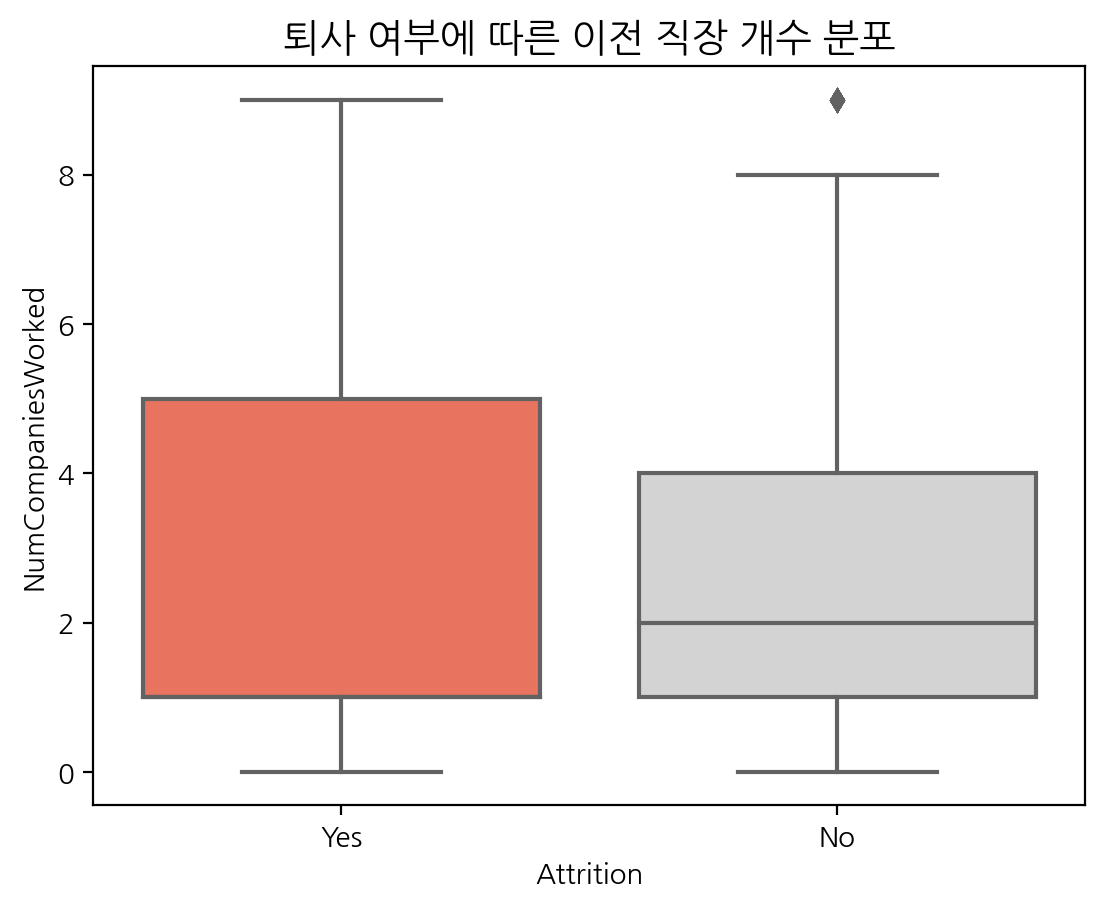

In [149]:
ax = sns.boxplot(data=df, x='Attrition', y='NumCompaniesWorked')
ax.set_title('퇴사 여부에 따른 이전 직장 개수 분포', fontsize=14)

Text(0.5, 1.0, '퇴사 여부에 따른 이전 직장 개수 분포')

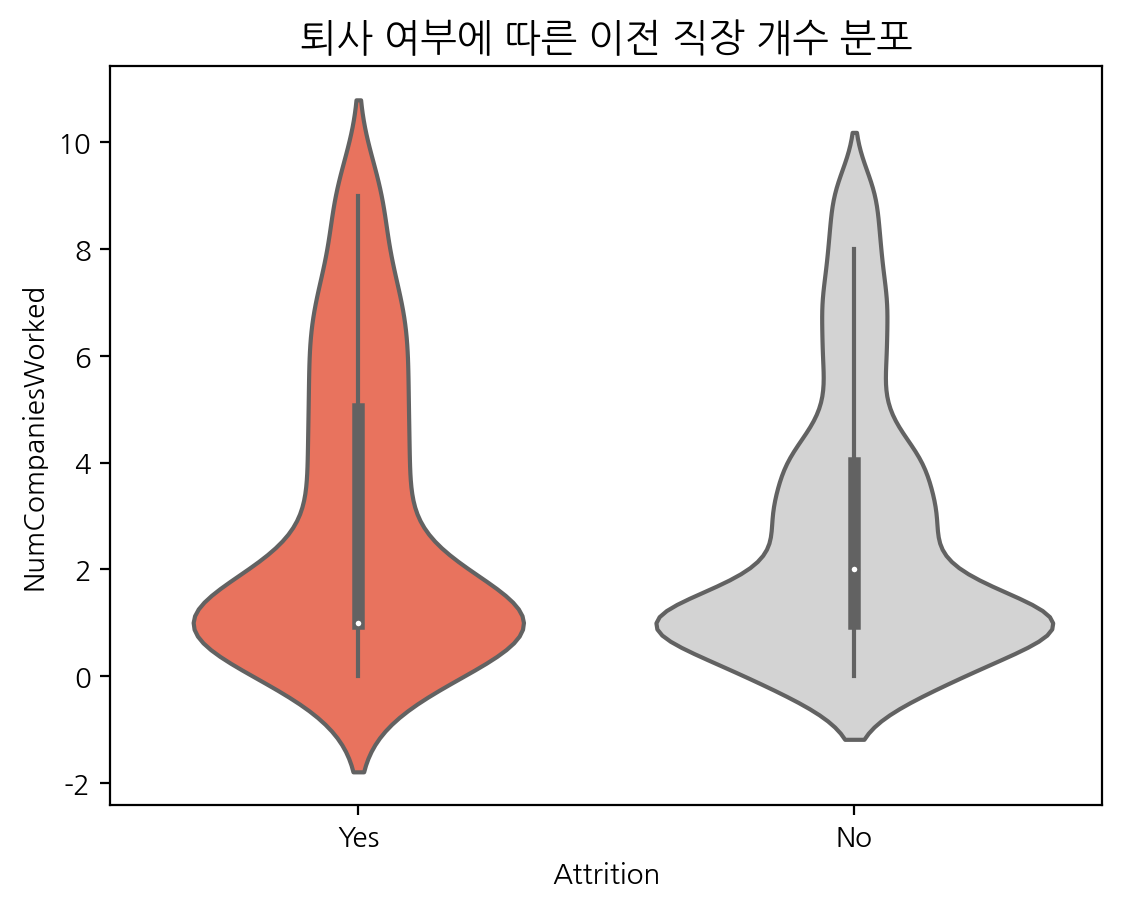

In [150]:
ax = sns.violinplot(data=df, x='Attrition', y='NumCompaniesWorked')
ax.set_title('퇴사 여부에 따른 이전 직장 개수 분포', fontsize=14)

# 인간관계에 따른 퇴사 여부

In [122]:
# 현 부서장과 함께 근무한 년수
df['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

Text(0.5, 1.0, '퇴사 여부에 따른 현 부서장과 근무 년수 분포')

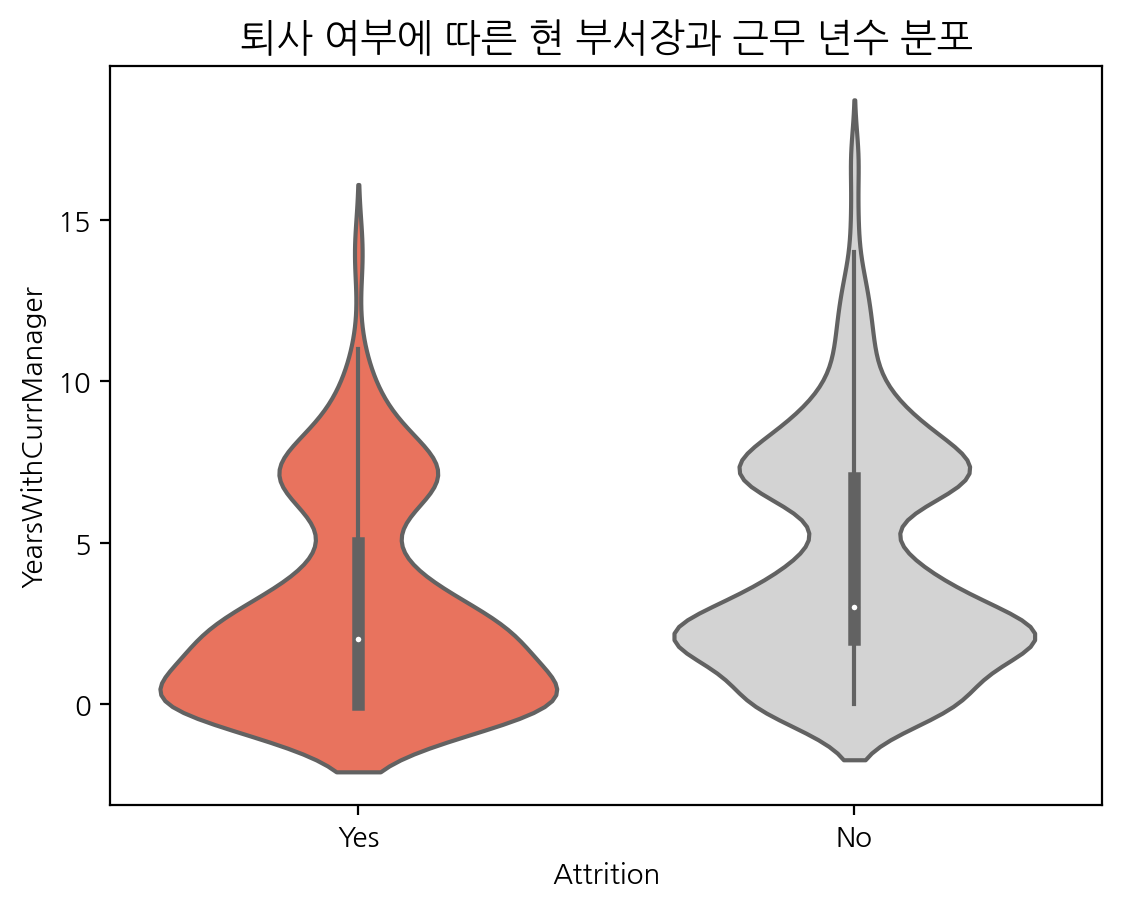

In [151]:
# violinplot
# 퇴사를 하는 사람은 대체적으로 현 부서장과 덜 오래 근무함.
# 부서장과의 유대 관계? 이것도 당연한 결과?
ax = sns.violinplot(data=df, x='Attrition', y='YearsWithCurrManager')
ax.set_title('퇴사 여부에 따른 현 부서장과 근무 년수 분포', fontsize=14)

In [124]:
# 현 부서장과 근무한 년수 별 퇴사비율
# 5년마다 YearsWithCurrManager 나누고 퇴사 비율 구하기

df['YearsWithCurrManager_Group'] = pd.cut(df['YearsWithCurrManager'], bins=range(0, df['YearsWithCurrManager'].max()+6, 5), right=False)
df[['YearsWithCurrManager', 'YearsWithCurrManager_Group']].head()

,YearsWithCurrManager,YearsWithCurrManager_Group
EmployeeNumber,,
1,5,"[5, 10)"
2,7,"[5, 10)"
4,0,"[0, 5)"
5,0,"[0, 5)"
7,2,"[0, 5)"


In [125]:
df_ywcm_attr = df.groupby('YearsWithCurrManager_Group').agg({"Attrition":"value_counts"})
df_ywcm_attr

Attrition
YearsWithCurrManager_Group Attrition           
[0, 5)                     No               747
                           Yes              176
[5, 10)                    No               392
                           Yes               55
[10, 15)                   No                80
                           Yes                6
[15, 20)                   No                14

In [127]:
# YearsWithCurrManager 그룹별 퇴사비율
attr_dict_ywcm = {'attr_0to4': (df_ywcm_attr.iloc[1,:] / (df_ywcm_attr.iloc[0,:] + df_ywcm_attr.iloc[1,:])),
             'attr_5to9': (df_ywcm_attr.iloc[3,:] / (df_ywcm_attr.iloc[2,:] + df_ywcm_attr.iloc[3,:])),             
             'attr_10to14': (df_ywcm_attr.iloc[5,:] / (df_ywcm_attr.iloc[4,:] + df_ywcm_attr.iloc[5,:])),
             'attr_15to19': 0}
attr_dict_ywcm

{'attr_0to4': Attrition    0.190683
 dtype: float64,
 'attr_5to9': Attrition    0.123043
 dtype: float64,
 'attr_10to14': Attrition    0.069767
 dtype: float64,
 'attr_15to19': 0}

In [128]:
attr_dict_ywcm_ratio = pd.DataFrame(attr_dict_ywcm)
attr_dict_ywcm_ratio

,attr_0to4,attr_5to9,attr_10to14,attr_15to19
Attrition,0.190683,0.123043,0.069767,0


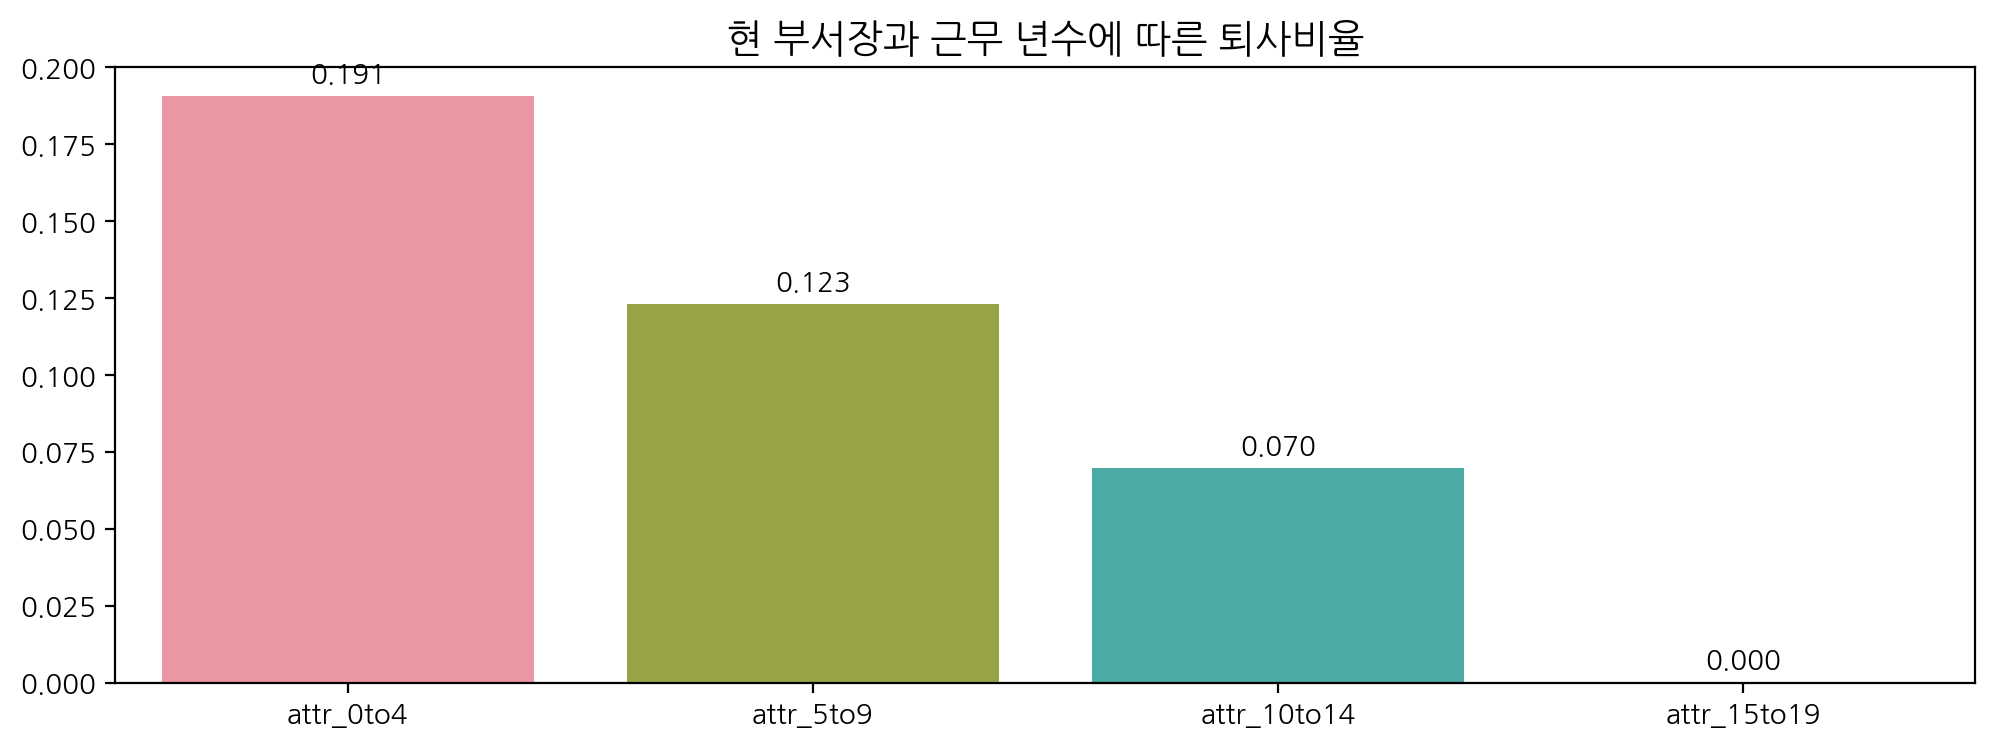

In [152]:
# YearsWithCurrManager 그룹별 퇴사비율 시각화
plt.figure(figsize=(12,4))
ax = sns.barplot(attr_dict_ywcm_ratio)
ax.set_title('현 부서장과 근무 년수에 따른 퇴사비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

In [177]:
# 퇴사한 사람들의 인간관계 만족도
# -> 퇴사한 사람의 경우 평균 0.2점 낮음.

df.groupby('Attrition').agg({'RelationshipSatisfaction':['mean', 'value_counts']})

RelationshipSatisfaction             
                             mean value_counts
(No, 1)                       NaN        219.0
(No, 2)                       NaN        258.0
(No, 3)                       NaN        388.0
(No, 4)                       NaN        368.0
(Yes, 1)                      NaN         57.0
(Yes, 2)                      NaN         45.0
(Yes, 3)                      NaN         71.0
(Yes, 4)                      NaN         64.0
No                       2.733982          NaN
Yes                      2.599156          NaN

<AxesSubplot: xlabel='Attrition', ylabel='RelationshipSatisfaction'>

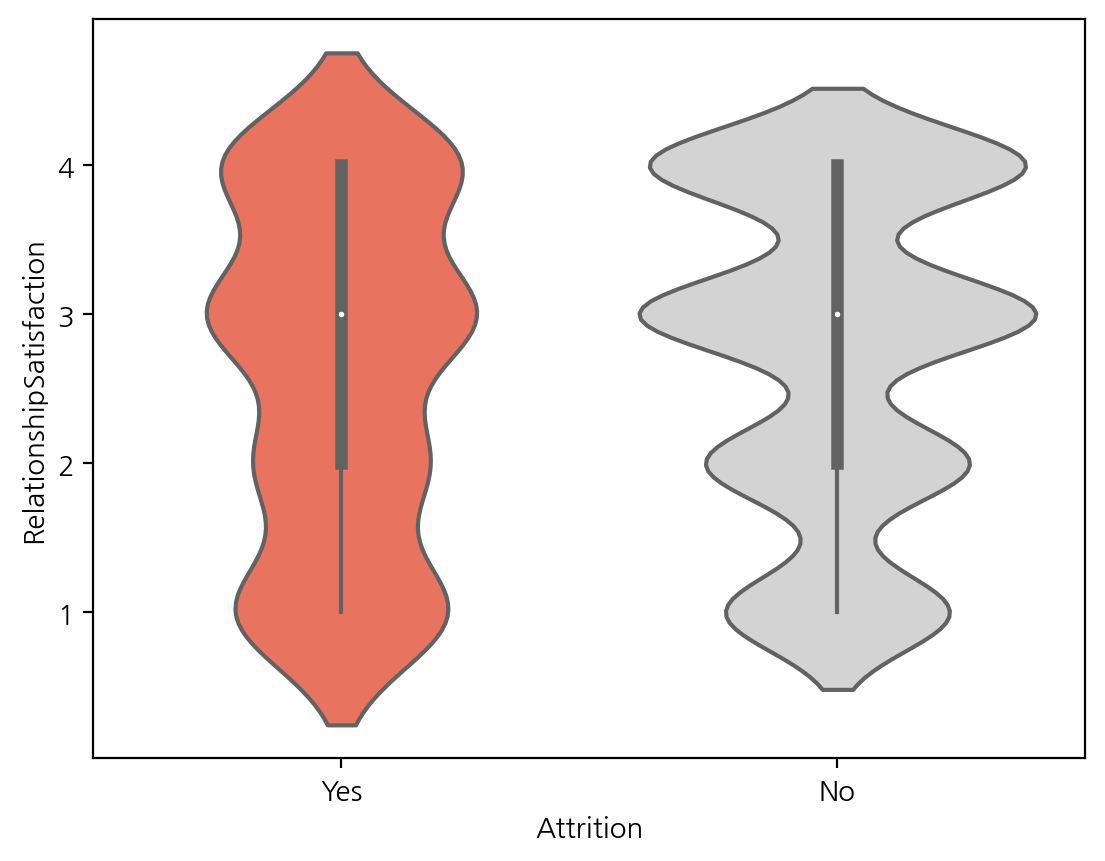

In [175]:
# 큰 특징 없음..
sns.violinplot(data=df, x='Attrition', y='RelationshipSatisfaction')

# 야근 여부에 따른 퇴사 여부

In [154]:
df['OverTime'].describe()

count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object

In [155]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [162]:
df_overtime_attr = df.groupby(['OverTime', 'Attrition']).agg({'Attrition':'count'})
df_overtime_attr

Attrition
OverTime Attrition           
No       No               944
         Yes              110
Yes      No               289
         Yes              127

In [166]:
# TotalWorkingYears 그룹별 퇴사비율
attr_overtime_dict = {'Overtime_No_attr': (df_overtime_attr.iloc[1,:] / (df_overtime_attr.iloc[0,:] + df_overtime_attr.iloc[1,:])),
             'Overtime_Yes_attr': (df_overtime_attr.iloc[3,:] / (df_overtime_attr.iloc[2,:] + df_overtime_attr.iloc[3,:]))}
attr_overtime_dict

{'Overtime_No_attr': Attrition    0.104364
 dtype: float64,
 'Overtime_Yes_attr': Attrition    0.305288
 dtype: float64}

In [167]:
df_overtime_attr_ratio = pd.DataFrame(attr_overtime_dict)
df_overtime_attr_ratio

,Overtime_No_attr,Overtime_Yes_attr
Attrition,0.104364,0.305288


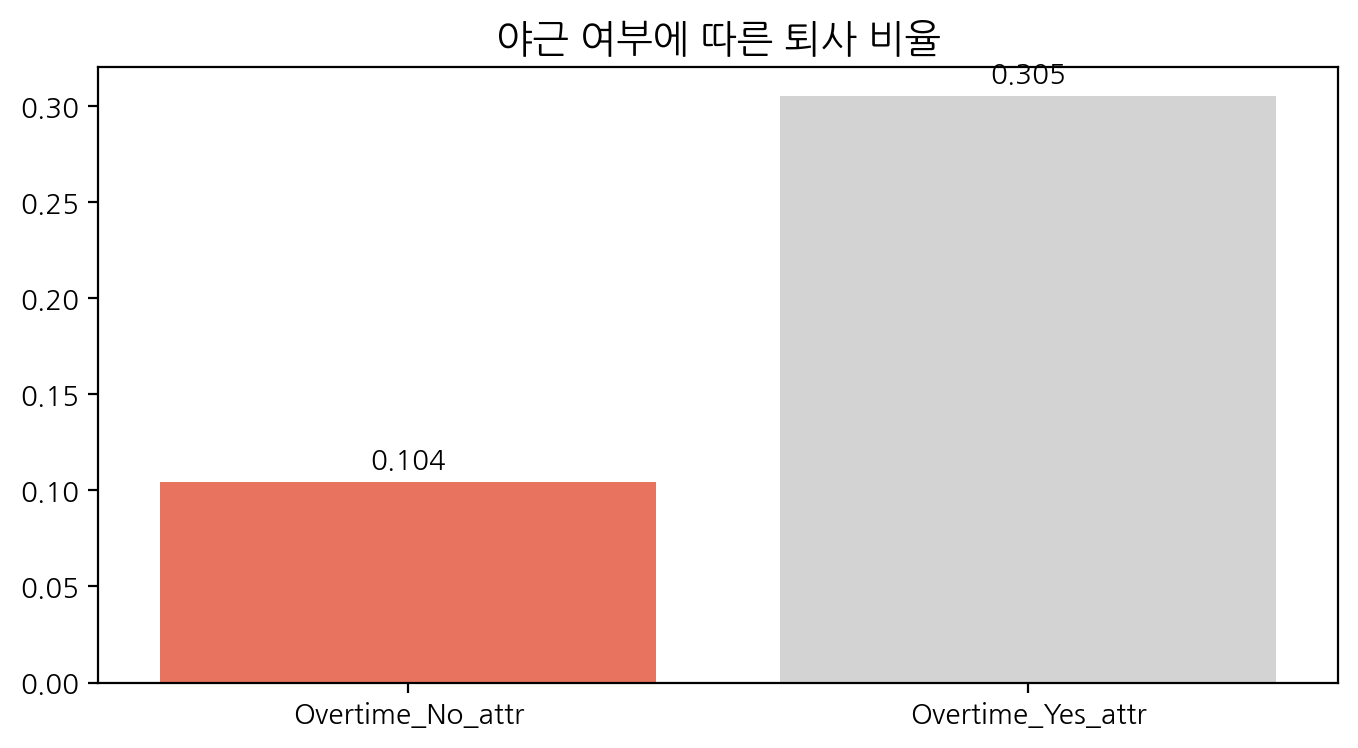

In [170]:
# 야근을 한 사람이 퇴사 비율이 높음

plt.figure(figsize=(8,4))
ax = sns.barplot(df_overtime_attr_ratio)
ax.set_title('야근 여부에 따른 퇴사 비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

# 머신러닝
## Feature Engineering

In [54]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Experienced
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,No
freq,1233,1043,961,606,882,326,673,1054,1077


In [55]:
# One-hot Encoding
# Attrition, OverTime, Gender 

In [56]:
# Ordinal Encoding
# BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [ ]:
# 불균형 라벨값 고려하기 stratify=y 였던가..